## <u>**IPL's IN THE HOUSE, GET READY FOLKS!!</u>**


# **Get back to your couch to witness your favorite team – play in that green field of excellence**

# **Introduction**
---

The **Indian Premier League (IPL)** is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities. In this IPL analysis EDA Project, we have six datasets i.e. players, matches, deliveries, most_runs_avg_strikerate, teams and teamwise_home_and_away. 

Before moving to our analysis, we first cleaned the data by removing trash data and filling in the missing data. Further, we divided the complete project into three main parts i.e Match-wise Team analysis, Season-wise Team analysis, and Entire IPL analysis.

In **Match Wise Team Analysis** we focused mainly on the scorecards, match results and teams' performance in a particular match against each other and some more aspects concerning each team only.

In **Season-wise Team Analysis** we compared performances of various teams in a season through points table, the number of matches won, etc, found out top 10 batsmen and bowlers of the season and some more.

In the **Entire IPL Analysis**, we will look at the penetration of players from different countries in the IPL, consistent performers, total runs, strike rate, average runs of batsmen in the entire IPL, etc.

### *So, without any further delay let’s move ahead!*


# **Installing Dependency**
We are using geopandas library to work with geospatial data that we used for visualization on the map of India.

In [ ]:
#@title
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 6.5MB 41.8MB/s 
     |████████████████████████████████| 15.3MB 202kB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
import numpy as np
import pandas as pd

import copy

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec

import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
folder_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/IPL/data'

In [ ]:
players_df = pd.read_excel(folder_path+'/Players.xlsx')
deliveries_df = pd.read_csv(folder_path+'/deliveries.csv')
matches_df = pd.read_csv(folder_path+'/matches.csv')
most_runs_avg_sr_df = pd.read_csv(folder_path+'/most_runs_average_strikerate.csv')
teams_df = pd.read_csv(folder_path+'/teams.csv')
teamwise_home_and_away_df = pd.read_csv(folder_path+'/teamwise_home_and_away.csv')

In [ ]:
map_state_df = gpd.read_file(folder_path+'/Igismap/Indian_States.shp')
map_district_df = gpd.read_file(folder_path+'/Igismap_district/India_Districts/India_Districts_ADM2_GADM.shp')

# **Data Wrangling**

First thing first. For any analysis, we always need a clean and clear dataset, and getting that kind of a dataset in the real world is just like once in a blue moon thing. So, let’s first understand and clean our dataset.

### **Datasets:**
 * Players Dataset
 * Deliveries Dataset
 * Matches Dataset
 * Most Runs, Average, and Strike Rate Dataset
 * Teams Dataset
 * Teamwise Home and Away Dataset

> 
Let’s describe each dataset in detail:


## **1. Players Dataset**

--- 
This dataset contains the information of each player played till now in the IPL. It consists of 566 rows and 5 columns.

### **Columns:**
> ***Player_Name***: Name of the players

> ***DOB***: date of birth of the players

> ***Batting_Hand***: Batting Hand of the players

> ***Bowling_skill***: Bowling skill of the players

> ***Country***: Country from which the players belong to.

>
Let’s have a look into the dataset,

In [ ]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
players_df.shape

(566, 5)

In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


### **Observations:**


---


* We can see that we have 95 NaN DOB and Country values. We will not be using all these rows while looking at the penetration of players from the different countries in the IPL because from our dataset we cannot identify the country of any player.

* We also have 3 and 64 NaN values of Batting_Hand and Bowling_skill. Here, we are filling Batting_Hand NaN with *‘Right_hand’* and Bowling_Skill NaN with *‘NA’ - Not Applicable* because most of the players are right handed and there can be players who do not have bowling skill.


In [ ]:
players_df['Batting_Hand'].fillna(value='Right_Hand',inplace=True)
players_df.fillna(value='NA', inplace=True)

In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            566 non-null    object
 2   Batting_Hand   566 non-null    object
 3   Bowling_Skill  566 non-null    object
 4   Country        566 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


## **2. Deliveries Dataset**

---

This dataset contains the information of each and every delivery played in the IPL. It consists of 179078 rows and 21 columns.

### **Columns:**

> **match_id:** It contains the match ID of each match. These are unique numbers assigned to each match.

> **inning:** Each match has at least two innings. The inning of a particular match can be identified through this column.

> **batting_team:** It contains the name of the team who is batting in a particular inning.

> **bowling_team:** It contains the name of the team who is bowling in a particular inning.

> **over:** It contains the information of the over number of a particular inning.

> **ball:** It contains the information of the ball number of a particular over.

> **batsman:** It contains the name of the batsman who is on the striking end or who is going to face the delivery.

> **non_striker:** It contains the name of the batsman who is on the non-striking end.
bowler: It contains the name of the bowler who is going to ball the delivery.

> **is_super_over:** If any match ties, then each team gets a chance to play one extra over, which will decide the match winner. This is known as super over. This column contains the information that the over is a super over or not. 1 if yes, 0 if no.

> **wide_runs:** It contains the runs scored when a bowler throws a wide ball.

> **bye_runs:** It contains the runs scored when bowler throws a fair delivery but ball doesn't touch the bat or leg of the batsman.

> **legbye_runs:** It contains the runs scored when bowler throws a fair delivery and ball touches the leg of the batsman, nothing else.

> **noball_runs:** It contains the runs scored by the batsman on a no ball delivery by the bowler.

> **penalty_runs:** The runs awarded to the batting team if any fielder or bowler tries to distract the batsman by any unfair means.

> **batsman_runs:** The runs scored by the batsman on a fair delivery.
extra_runs: Total extra_runs given by the bowler in a particular delivery.

> **total_runs:** Total runs scored in a particular delivery.
player_dismissed: If any batsman dismissed(or out) in a particular delivery. 1 if yes and 0 if no.

> **dismissal_kind:** It contains the information on how a batsman got dismissed.

> **fielder:** It contains the name of the fielder who caught out, runout or stumped the batsman.

Let’s have a look into the dataset,

In [ ]:
deliveries_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries_df.shape

(179078, 21)

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### **Observations:**
---

* We can see that we have 5 innings in a few matches. But this is not possible. We could have at most 4 innings in a match if the match ties. So, we are going to delete all the rows which have a 5th inning.

* For the ease of analysis, we will merge the third and the fourth innings with their respective innings because we are interested in the performance of the team, not if the match ties.

* We do not have NaN values in this dataset except player_dismissed, dismissal_kind and fielder columns, which is acceptable.


In [ ]:
print('Old deliveries_df shape:',deliveries_df.shape)
new_deliveries_df = deliveries_df[(deliveries_df['inning'] != 1) & (deliveries_df['inning'] != 2)]

# from deliveries_df remove innings greater than 2 when there is no super over
for index, row in new_deliveries_df.iterrows():
    if row.inning > 2 and row.is_super_over == 0:
        deliveries_df.drop(index=index, inplace=True)

print('New deliveries_df shape:',deliveries_df.shape)

Old deliveries_df shape: (179078, 21)
New deliveries_df shape: (179063, 21)


In [ ]:
def decide_inning(row):
    id = row[0] # row[0] = deliveries_df['match_id']
    ball = row[5] # row[0] = deliveries_df['ball']
    batting_team = row[2] # row[0] = deliveries_df['batting_team']

    del_df = deliveries_df[deliveries_df['match_id'] == id].values[0] # 1st row of match whose match id is equal to match id of row provided.
    team = del_df[2] # team name of 1st batting team
    new_inning = 1 if batting_team == team else 2

    deliveries_df.loc[((deliveries_df.match_id == id) &
                       (deliveries_df.is_super_over == 1) & 
                       (deliveries_df.ball == ball) & 
                       (deliveries_df.batting_team == batting_team)), 'inning'] =  new_inning # To get unique row we did four checks

deliveries_df[deliveries_df.is_super_over == 1].apply(lambda row: decide_inning(row) , axis =1)
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000,179063.000000
mean,1801.464764,1.481858,10.163255,3.615627,0.000452,0.036725,0.004937,0.021138,0.004183,0.000056,1.246785,0.067038,1.313823
std,3471.400025,0.499672,5.677303,1.806969,0.021264,0.251171,0.116485,0.194916,0.070495,0.016710,1.608226,0.342567,1.605381
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## **3. Matches Dataset**
---

This dataset contains the summary of each match played in the IPL. It has 756 rows and 18 columns.


### **Columns:**

> **id:** It is the match ID of a particular match. It is the same as match_id in the deliveries dataset.

> **Season:** It contains the season(year) of the IPL.

> **city:** It contains the name of the city in which that particular match was played.

> **date:** It contains the date on which that particular match was played.

> **team1:**  It contains the name of the team who batted first in the match.

> **team2:** It contains the name of the team who fielded first in the match.

> **toss_winner:** It contains the name of the team who won the toss.

> **toss_decision:** It contains the decision of the team who won the toss.

> **result:** It contains the information if the match was tied or not.

> **dl_applied:** It contains the information if the Duckworth–Lewis–Stern method is applied or not.

> **winner:** It contains the name of the team who won the match.

> **win_by_runs:** It contains the runs by which a team won.

> **win_by_wickets:** It contains the wickets by which a team won.

> **player_of_match:** It contains the name of the player who became the 
player of the match in that particular match.

> **venue:** It contains the name of the venue on which that particular match was played.

> **umpire1:** Umpire 1 name

> **umpire2:** Umpire 2 name

> **umpire3:** Umpire 3 name

Let’s have a look into the dataset,

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df.shape

(756, 18)

In [ ]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### **Observations:**
---
* We can see that we have Season column as an object. It’s value type is *string*. We change each value of this column with its year, for better understanding.

* We can see that there are a few venues with a little difference in the names. So, we changed the same venues with different names to one single venue name.

* We have noticed that a few city values are also NaN and when we looked at all those NaN rows, we figured out that its city's value is Dubai. So, we filled NaN values of city with 'Dubai'.

* We have merged the city and the venue name and sorted the whole dataset by 'date'. This is beneficial for the upcoming analysis. 

* There are 4 matches where the winner is NaN. We have created a function “scorecard” through which we can extract the scorecard of each match(we will explain this function later in the analysis). We have checked with this function, all these matches’s information is incomplete in the deliveries_df. So, we dropped all these rows and removed it from our analysis.

* We have added season wise match number (a new column). We have done this for the ease of analysis.

* There are a few NaN values in some other columns as well but we have ignored them because it does not affect our analysis.


In [ ]:
matches_df['Season'] = matches_df.Season.apply(lambda x: int(x[-4:]))

In [ ]:
old_stad_new_stad_dict = {
    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium', 
    'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium', 
    'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium', 
    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal', 
    'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
    'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium',
    'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'MA Chidambaram Stadium, Chepauk':'M. A. Chidambaram Stadium'
  }

old_city_new_city_dict = {
    'Bengaluru':'Bangalore',
    'Mohali':'Chandigarh'
  }

def change_name(team_name, old_name_new_name_dict):
    if team_name in old_name_new_name_dict.keys():
        return old_name_new_name_dict[team_name]
    return team_name

matches_df['venue'] = matches_df['venue'].apply(lambda x: change_name(x, old_stad_new_stad_dict))
matches_df['city'] = matches_df['city'].apply(lambda x: change_name(x, old_city_new_city_dict))

# Venue names with cities
matches_df['city'].fillna(value = 'Dubai', inplace= True)
matches_df.venue = matches_df.venue + ', ' +matches_df.city


# Sort by date
matches_df.date = matches_df.date.apply(lambda x: pd.to_datetime(x))
matches_df.sort_values('date',inplace=True)
matches_df.reset_index(inplace=True)

In [ ]:
'''Drop all the rows whose winner is unknown...'''

print('**** Shape Before row deletion ****')
print('matches_df Shape: ',matches_df.shape)
print('deliveries_df Shape: ',deliveries_df.shape)

# Dropping from matches_df dataframe
drop_index_for_matches_df = matches_df[matches_df.winner.isna()].index
matches_df.drop(index=drop_index_for_matches_df, inplace=True)

# Dropping from deliveries_df dataframe
drop_match_id_for_deliveries_df = matches_df.iloc[matches_df[matches_df.winner.isna()].index].id.values
for m_id in drop_match_id_for_deliveries_df:
    drop_index_for_deliveries_df = deliveries_df[deliveries_df.match_id == m_id].index 
    deliveries_df.drop(index=drop_index_for_deliveries_df, inplace =True)

print()
print('**** Shape After row deletion ****')
print('matches_df Shape: ',matches_df.shape)
print('deliveries_df Shape: ',deliveries_df.shape)

**** Shape Before row deletion ****
matches_df Shape:  (756, 19)
deliveries_df Shape:  (179063, 21)

**** Shape After row deletion ****
matches_df Shape:  (752, 19)
deliveries_df Shape:  (179063, 21)


In [ ]:
def add_season_wise_match_number():
    x = matches_df['Season'][0]
    ls = []
    i=0
    for season in matches_df['Season']:
        if x == season:
            i+=1
            ls.append(i)
        else:
            x=season
            i=1
            ls.append(i)
        
    matches_df['match_number'] = ls

add_season_wise_match_number()

In [ ]:
matches_df.head()

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_number
0,76,77,2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal, Hyd...",BR Doctrove,RB Tiffin,NaN,1
1,77,78,2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,"Sawai Mansingh Stadium, Jaipur",RE Koertzen,GA Pratapkumar,NaN,2
2,116,117,2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Dr DY Patil Sports Academy, Mumbai",BF Bowden,RE Koertzen,NaN,3
3,78,79,2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"M. A. Chidambaram Stadium, Chennai",BF Bowden,K Hariharan,NaN,4
4,110,111,2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,"M. Chinnaswamy Stadium, Bangalore",BR Doctrove,SL Shastri,NaN,5


## **4. Most Runs, Average, and Strike Rate Dataset:**
---
This dataset contains details of performance of each batsman. It consists of 516 rows and 6 columns.

### Columns:

> **batsman:** The name of the batsman.

> **total_runs:** Total runs scored by a batsman in the IPL.

> **out:** No. of times a batsman out in the IPL.

> **numberofballs:** Number of balls faced in the IPL.

> **average:** Average runs scored in the IPL.

> **strikerate:** Strike rate of each player in the IPL.

Let’s have a look into the dataset,

In [ ]:
most_runs_avg_sr_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
most_runs_avg_sr_df.shape

(516, 6)

In [ ]:
most_runs_avg_sr_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [ ]:
most_runs_avg_sr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


### **Observations:**
---
* We can see that there are a few NaN values in the average column, but have replaced all with the average runs scored by the respective batsman.

* We have noticed that the total runs scored by the batsman is way too high than the averages and strike rates. So, for the ease of analysis we divided the total runs by 20.

In [ ]:
# Average runs scored by those batsman are zero
most_runs_avg_sr_df.fillna(0,inplace=True)

# dividing total runs by 20
most_runs_avg_sr_df.total_runs = most_runs_avg_sr_df.total_runs/20

most_runs_avg_sr_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,271.30,152,4111,35.697368,131.987351
1,SK Raina,269.30,160,3916,33.662500,137.538304
2,RG Sharma,245.10,161,3742,30.447205,130.999466
3,DA Warner,235.85,114,3292,41.377193,143.286756
4,S Dhawan,230.05,137,3665,33.583942,125.538881


In [ ]:
most_runs_avg_sr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    float64
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        516 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.3+ KB


## **5. Teams Dataset**
---
This dataset consists of names of all the teams played in the IPL. It has 15 rows and 1 column.

### **Columns:**

> **teams:** It contains the name all the teams played in the IPL.

Let’s have a look into the dataset,

In [ ]:
teams_df.shape

(15, 1)

In [ ]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


### **Observations:**
---
* We can see that there are some teams with different names. This happened because a few teams changed their names after a few seasons.

* We need to change the team's name in each and every dataset.

In [ ]:
old_team_name_new_name_dict = {
    'Deccan Chargers' :'Sunrisers Hyderabad', 
    'Pune Warriors': 'Rising Pune Supergiant', 
    'Rising Pune Supergiants':'Rising Pune Supergiant',
    'Delhi Daredevils':'Delhi Capitals'
    }


for column in ['team1','team2','toss_winner','winner']: 
  matches_df[column] = matches_df[column].apply(lambda x: change_name(x, old_team_name_new_name_dict))


for column in ['batting_team','bowling_team']: 
  deliveries_df[column] = deliveries_df[column].apply(lambda x: change_name(x, old_team_name_new_name_dict))

# team_wise_home_and_away_df dataframe
teamwise_home_and_away_df['team'] = teamwise_home_and_away_df['team'].apply(lambda x: change_name(x, old_team_name_new_name_dict))


# teams_df dataframe
teams_df['team1'] = teams_df.team1.apply(lambda x: change_name(x, old_team_name_new_name_dict)).drop_duplicates()
teams_df.dropna(inplace=True)
teams_df.reset_index(inplace=True)
teams_df.drop(columns='index', inplace=True)

In [ ]:
teams_df

,team1
0,Rising Pune Supergiant
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Delhi Capitals
7,Sunrisers Hyderabad
8,Mumbai Indians
9,Royal Challengers Bangalore


## **6. Teamwise Home and Away Dataset**
---
This dataset contains the details of each team won in their home ground or away ground. It has 14 rows and 7 columns.

### **Columns:**

> **team:** Name of the teams.

> **home_wins:** Number of matches won by the team in their home ground.

> **home_matches:** Number of matches played by the team in their home ground.

> **away_wins:** Number of matches won by the team in other grounds.

> **away_matches:** Number of matches played by the team in other grounds.

In [ ]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [ ]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


In [ ]:
teamwise_home_and_away_df.shape

(14, 7)

In [ ]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


The data looks pretty good and cleansed! Now we can use it to analyze different teams, performances, best players, grounds favorable for the teams, expected targets, chasable scores, team strengths and weaknesses, and much more...


---

#***So, Let's begin the project now!***








# **Match Wise Team Analysis**

### First, let's see how the teams are performing against each other. For that, we would require scorecards of matches. So let's fetch the scorecards from our dataset.
 
### Here, we are going to define a <u>*scorecard*</u> function, to which if you give a *match_number*, it will return you the scorecard of both the innings.
 
### Now, you may ask, if the match ties, then there would be super over innings as well i.e. third and fourth innings?
 
### For that, we merged the third and fourth innings scores with the first and the second innings scores respectively. Why did we do that? Actually, we are not interested if the match ties or if a decision comes out after the second inning. We are more interested in the winner and the difference by which a team won the match, which shows the team's strength.
 
### We are interested in the player's and team's performance, which we can analyze through graphs, made with the help of scorecards. Let's create a function *scorecard*.



In [ ]:
#provides information regading a match through match-id
def get_match_info(match_id):
    match_info = {}
    df = matches_df[matches_df['id'] == match_id]
    match_info['Match'] = f'{df["team1"].values[0]} vs {df["team2"].values[0]},{df["Season"].values[0]}'
    match_info['Date'] = df['date'].values[0]
    match_info['Match Number'] = df['match_number'].values[0]
    match_info['Toss'] = f'{df["toss_winner"].values[0]} won the toss and opt to {df["toss_decision"].values[0]}'
    match_info['Venue'] = f'{df["venue"].values[0]}'
    match_info['Player of Match'] = df['player_of_match'].values[0]
    match_info['Umpires'] = f'{df["umpire1"].values[0]},{df["umpire2"].values[0]}'
    if df['umpire3'].values[0] == df['umpire3'].values[0]:
        match_info['Third Umpire'] = df['umpire3'].values[0]
    
    return match_info


def select_match(match_no):
    if match_no > 752:
        print('Invalid Match Number!')
        return None

    global match_id
    match_id = matches_df.iloc[match_no-1]['id']
    match_info = get_match_info(match_id)
    print("--Match Info--")
    for keys,values in match_info.items():
        print(f'{keys} : {values}')

In [ ]:
def get_match_deliveries(match_id):
  return deliveries_df[deliveries_df['match_id'] == match_id]

# from batsman and bowler delivery details create dataframe for batsman and bowler deliveries
def create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict):
  bowler_list = []
  batsman_list = []
 
  for batsman in batsman_run_ball_dict :
    batsman_dict = batsman_run_ball_dict[batsman]
    temp_dict = {'batsman': batsman, 'runs': batsman_dict['run'], 'ball':batsman_dict['bowls_played'], 'strike_rate': batsman_dict['strike_rate']}
    batsman_list.append(temp_dict)
  
  for bowler in bowler_detail_dict :
    bowler_dict = bowler_detail_dict[bowler]
    temp_dict = {'bowler': bowler, 'over':bowler_dict['overs'],'runs': bowler_dict['runs_given'], 'wickets':len(bowler_dict['wicket_took']), 'economy': bowler_dict['eco']}
    bowler_list.append(temp_dict)

  final_batsman_df = pd.DataFrame(batsman_list)
  final_bowler_df = pd.DataFrame(bowler_list)

  return final_batsman_df, final_bowler_df

# for inning df provided return dataframe with over, total_runs in over, player_dismissed(1 or 0) and total_score
def get_overs_stats(inning):
    temp_df = copy.deepcopy(inning)
    temp_df['player_dismissed'] = temp_df['player_dismissed'].apply(lambda x: 1 if x == x else 0)
    over_runs_wickets = temp_df.groupby('over', as_index = False).agg({'total_runs':'sum','player_dismissed':'sum'})
    
    runs = 0
    new_col = []
    for index, row in over_runs_wickets.iterrows():
        new_col.append(runs + row['total_runs'])
        runs = new_col[-1]
    over_runs_wickets['score'] = pd.Series(new_col)

    return over_runs_wickets

# for inning df provided returns inning scorecard, number off wickets fall, over stats returned from get_overs_stats, and number of extra balls
def get_batsman_bowler_details(inning):
  batsman_run_ball_dict = {}
  bowler_detail_dict = {}
  wickets_fall = 0
  extra_balls = 0
  overs_stats = get_overs_stats(inning[['over','total_runs','player_dismissed']])

  for index, row in inning.iterrows():
      
      batsman = row['batsman']
      run = row['batsman_runs']
      total_runs = row['total_runs']

      bowler = row['bowler']
      wicket = row['player_dismissed']
      wicket_kind = row['dismissal_kind']

      if row.wide_runs!= 0 or row.noball_runs!=0:
          extra_balls += 1

      if batsman in batsman_run_ball_dict:
        batsman_run_ball_dict[batsman]['run'] += run
        batsman_run_ball_dict[batsman]['bowls_played'] += 1     
      else:
        batsman_run_ball_dict[batsman] = {'run':run, 'bowls_played':1}
    
      if bowler in bowler_detail_dict:
        bowler_detail_dict[bowler]['bowls_bowled'] += 1
        bowler_detail_dict[bowler]['runs_given'] += total_runs
      else:
        bowler_detail_dict[bowler] = {'runs_given':total_runs, 'bowls_bowled':1, 'wicket_took':[]}
        #Please ignore the typo 'bowls'

      if wicket == wicket and wicket_kind not in ['run out', 'retired hurt','obstructing the field']:
        bowler_detail_dict[bowler]['wicket_took'].append(wicket)
        wickets_fall += 1
      elif wicket_kind in ['run out', 'retired hurt', 'obstructing the field']:
        wickets_fall += 1

  for batsman in batsman_run_ball_dict:
    batsman_dict = batsman_run_ball_dict[batsman]
    strike_rate = int(batsman_dict['run'])/int(batsman_dict['bowls_played'])*100
    batsman_dict['strike_rate'] = round(strike_rate,2)

  for bowler in bowler_detail_dict:
    bowler_dict = bowler_detail_dict[bowler]
    eco = bowler_dict['runs_given']*6/bowler_dict['bowls_bowled']
    bowler_dict['eco'] = round(eco,2)

    overs = str(bowler_dict['bowls_bowled']//6)+'.'+str(bowler_dict['bowls_bowled']%6)
    bowler_dict['overs'] = overs

  return create_inning_scorecard(batsman_run_ball_dict, bowler_detail_dict), wickets_fall, overs_stats, extra_balls

# returns total number of overs played in an inning
def get_total_overs(inning_overs, extra_balls):
    overs = 0
    balls = 0
    for over in inning_overs:
        temp_list = over.split('.')
        overs += int(temp_list[0])
        balls += int(temp_list[1])

    balls -= extra_balls
    overs += balls//6
    balls = balls%6

    total_overs = overs + 0.1*balls

    return total_overs

# return scorecard components like inning dataframe, number of wickets and over statistics obtained from get_batsman_bowler_details(inning) function
def get_scorecard(match_id):
    delivery_df = deliveries_df[deliveries_df['match_id'] == match_id]
    inning_one_df = delivery_df[delivery_df['inning']==1]
    inning_two_df = delivery_df[delivery_df['inning']==2]
    inn_1, inn_2 = {}, {}

    inn_1['scorecard'], wickets_1, overs_stats_1, extra_balls = get_batsman_bowler_details(inning_one_df)
    inn_1['overs'] = get_total_overs(inn_1['scorecard'][1]['over'], extra_balls=extra_balls)
    inn_1['runs'] = inn_1['scorecard'][1]['runs'].sum()

    inn_2['scorecard'], wickets_2, overs_stats_2, extra_balls = get_batsman_bowler_details(inning_two_df)
    inn_2['overs'] =  get_total_overs(inn_2['scorecard'][1]['over'], extra_balls=extra_balls)
    inn_2['runs'] = inn_2['scorecard'][1]['runs'].sum()


    return inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2

# Finally print scorecard for inning number provided
def scorecard(inning):
    global inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2, team1, team2

    team1, team2 = matches_df[matches_df.id==match_id]['team1'].values[0], matches_df[matches_df.id==match_id]['team2'].values[0]

    inn_1, wickets_1, inn_2, wickets_2, overs_stats_1, overs_stats_2 = get_scorecard(match_id)

    if inning==1:
        print('\033[1m***********'*4,'\n\t\t Inning: 1\n'+'***********'*4)
        print(f'{team1}\n'+'***********'*4)
        print('| Score: '+str(inn_1['runs'])+'/'+str(wickets_1),'| Target: '+str(inn_1['runs']+1)+' | Overs:',inn_1['overs'],'|') 
        print('\n\033[1mScorecard: ')
        return pd.concat([inn_1['scorecard'][0], inn_1['scorecard'][1]], axis=1).fillna(' ')

    elif inning==2:
        print('\033[1m***********'*4,'\n\t\tInning: 2\n'+'***********'*4)
        print(f'{team2}\n'+'***********'*4)
        print('| Score: '+str(inn_2['runs'])+'/'+str(wickets_2),'| Target: '+str(inn_1['runs']+1)+' | Overs:',inn_2['overs'],'|')
        print('\n\033[1mScorecard: ')
        return pd.concat([inn_2['scorecard'][0], inn_2['scorecard'][1]], axis=1).fillna(' ')
    else:
        return None


In [ ]:
def show_batting_statistics(inning):
    sns.set_theme(style="whitegrid")
    ax = plt.figure(figsize=(18,7))
    
    if inning==1:  
        inn1_df = inn_1['scorecard'][0]
        
        ax = sns.barplot(data = inn1_df, x = 'batsman', y = 'runs', color = 'orange',alpha=0.7)
        ax = sns.barplot(data = inn1_df, x = 'batsman', y = 'ball', color = 'red',alpha=0.4)
        
        for p, rate in zip(ax.patches, inn1_df['strike_rate']):
            ax.annotate(format('S.R.: '+str(rate)), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext=(0,9),
                    textcoords = 'offset points')

        ax.set_title('Batting Statistics of {}'.format(team1), fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_ylabel('Runs v/s Balls', fontsize=18)
        ax.set_xlabel('Batsman', fontsize=18)

    elif inning==2:
        inn2_df = inn_2['scorecard'][0]

        ax = sns.barplot(data = inn2_df, x = 'batsman', y = 'runs', color = 'orange',alpha=0.7)
        ax = sns.barplot(data = inn2_df, x = 'batsman', y = 'ball', color = 'red',alpha=0.4)


        for p, rate in zip(ax.patches, inn2_df['strike_rate']):
            ax.annotate(format('S.R.: '+str(rate)), (p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha = 'center', va = 'center',xytext=(0,9),
                    textcoords = 'offset points')


        ax.set_title('Batting Statistics of {}'.format(team2), fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_ylabel('Runs v/s Balls', fontsize=18)
        ax.set_xlabel('Batsman', fontsize=18)
        
    return ax


In [ ]:
def batting_contribution(inning):
    if inning==1:
        inn1_df = inn_1['scorecard'][0]
        ax = inn1_df.set_index('batsman').plot.pie(y = 'runs',figsize=(8,8))

        ax.set_title('Contibution by each player of {}'.format(team1),fontdict={'fontsize': '25', 'fontweight' : 'bold'})

    elif inning==2:
        inn2_df = inn_2['scorecard'][0]
        ax = inn2_df.set_index('batsman').plot.pie(y = 'runs',figsize=(8,8))

        ax.set_title('Contibution by each player of {}'.format(team2),fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    return ax

In [ ]:
def bowling_statistics(inning):
    
    sns.set_theme(style="whitegrid")
    ax = plt.figure(figsize=(18,7))

    if inning==1:
    
        inn1_df = inn_1['scorecard'][1]
        ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'runs', color= 'red',alpha=0.7)
        ax = sns.barplot(data = inn1_df, x = 'bowler', y = 'economy', color = 'brown',alpha=0.8)

        for p, eco in zip(ax.patches, inn1_df['wickets']):
            ax.annotate(format('Wickets:'+str(eco)), (p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha = 'center', va = 'center',xytext=(0,9),
                    textcoords = 'offset points')
            
        ax.set_title('Bowling Statistics of {}'.format(team2),fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_xlabel( 'Bowlers', fontsize=18)
        ax.set_ylabel('Runs v/s Economy', fontsize=18)
    
    elif inning==2:

        inn2_df = inn_2['scorecard'][1]
        ax = sns.barplot(data = inn2_df, x = 'bowler', y = 'runs', color= 'red',alpha=0.7)
        ax = sns.barplot(data = inn2_df, x = 'bowler', y = 'economy', color = 'brown',alpha=0.8)

        for p, eco in zip(ax.patches, inn2_df['wickets']):
            ax.annotate(format('Wickets:'+str(eco)), (p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha = 'center', va = 'center',xytext=(0,9),
                    textcoords = 'offset points')

        ax.set_title('Bowling Statistics of {}'.format(team1), fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_xlabel( 'Bowlers', fontsize=18)
        ax.set_ylabel('Runs v/s Economy', fontsize=18)

    return ax

In [ ]:
def runs_per_over(inning):

    sns.set_theme(style="whitegrid")
    ax = plt.figure(figsize=(15,7))

    if inning==1:

        overs_stats_df = overs_stats_1
        ax = sns.barplot(data = overs_stats_df, x = 'over', y = 'total_runs', palette= 'Set2')

        for p, wickets in zip(ax.patches, overs_stats_df['player_dismissed']):
            ax.annotate(' * '*wickets, (p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha = 'center', va = 'center',xytext=(0,9),
                    textcoords = 'offset points')
            
        ax.set_title('Runs Per Over of {}'.format(team1), fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_xlabel('Overs', fontsize =18)
        ax.set_ylabel('Runs', fontsize =18) 

    elif inning==2:

        overs_stats_df = overs_stats_2
        ax = sns.barplot(data = overs_stats_df, x = 'over', y = 'total_runs', palette= 'Set2')
       
        for p, wickets in zip(ax.patches, overs_stats_df['player_dismissed']):
            ax.annotate(' * '*wickets, (p.get_x() + p.get_width() / 2.,p.get_height()),
                    ha = 'center', va = 'center',xytext=(0,9),
                    textcoords = 'offset points')

        ax.set_title('Runs Per Over of {}'.format(team2), fontdict={'fontsize': '25', 'fontweight' : 'bold'})
        ax.set_xlabel('Overs', fontsize =18)
        ax.set_ylabel('Runs', fontsize =18)
    return ax

In [ ]:
def scoring_rates():
    df1 = inn_1['scorecard'][0]
    df1['Team'] = team1
    df2 = inn_2['scorecard'][0]
    df2['Team'] = team2
    new_name = {'batsman': 'Batsman', 'runs': 'Runs Scored','ball': 'Balls Faced','strike_rate':'Strike Rate'}
    batting_df = df1.merge(df2, how='outer')
    batting_df.rename(columns = new_name, inplace=True)
    batting_df.head()
    
    ax = px.scatter(batting_df, x="Balls Faced", y="Runs Scored",color = 'Team',size='Strike Rate',
                    title='Scoring Rates',hover_data=['Batsman'])
    return ax

In [ ]:
def manhattan():

    sns.set_theme(style="whitegrid")
    ax = plt.figure(figsize=(15,7))

    df1, df2 = copy.deepcopy(overs_stats_1), copy.deepcopy(overs_stats_2)
    df1.rename(columns={'total_runs': team1,'player_dismissed':'player_dismissed_1'}, inplace=True)
    df2.rename(columns={'total_runs': team2,'player_dismissed':'player_dismissed_2'}, inplace=True)
    df = df1.merge(df2, how='outer',on='over')
    df.fillna(0,inplace=True)

    ax = df.plot(x='over',y=[team1,team2],kind='bar',figsize=(18,8))


    for p1,p2, w1,w2 in zip(ax.patches[:(len(ax.patches)//2)+1],ax.patches[len(ax.patches)//2:], df['player_dismissed_1'], df['player_dismissed_2']):
        ax.annotate('*'*int(w1), (p1.get_x() + p1.get_width() / 2.,p1.get_height()),
                ha = 'center', va = 'center',xytext=(0,9),
                textcoords = 'offset points')
        ax.annotate(' *'*int(w2), (p2.get_x() + p2.get_width() / 2.,p2.get_height()),
                ha = 'center', va = 'center',xytext=(0,9),
                textcoords = 'offset points')
    
    ax.set_title('MANHATTAN', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    ax.set_xlabel('Overs', fontsize = 18)
    ax.set_ylabel('Runs', fontsize = 18)
    
    return ax
    


In [ ]:
def run_rate():

    overs_stats_df_1 = copy.deepcopy(overs_stats_1)
    overs_stats_df_2 = copy.deepcopy(overs_stats_2)

    overs_stats_df_1['player_dismissed_at'] = [at if is_out>0 else np.nan for is_out, at in zip(overs_stats_df_1.player_dismissed, overs_stats_df_1.score)]
    overs_stats_df_2['player_dismissed_at'] = [at if is_out>0 else np.nan for is_out, at in zip(overs_stats_df_2.player_dismissed, overs_stats_df_2.score)]

    sns.set_theme(style="whitegrid")
    ax = plt.figure(figsize=(15,7))

    ax = sns.lineplot(data = overs_stats_df_1, x = 'over', y = 'score',label = team1)
    ax = sns.lineplot(data = overs_stats_df_2, x = 'over', y = 'score',label = team2)
    ax = sns.scatterplot(data = overs_stats_df_1, x='over', y= 'player_dismissed_at', marker = 'o')
    ax = sns.scatterplot(data = overs_stats_df_2, x='over', y= 'player_dismissed_at', marker = 'o')

    ax.set_title('Run Rate', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    ax.set_xlabel('Overs', fontsize = 18)
    ax.set_ylabel('Runs', fontsize = 18)

    return ax

In [ ]:
# This funtion handles the tie matches according to the matches_df but actually they are not.
def is_actually_tied():
    if deliveries_df[deliveries_df.match_id==match_id].is_super_over.sum() > 0:
        return True
    return False  



def match_result():
    match_details = matches_df[matches_df['id'] == match_id]
    team1 = match_details['team1'].values[0]
    team2 = match_details['team2'].values[0]
    winner = match_details['winner'].values[0]

    match_result_df = pd.DataFrame(columns=['Result'],index = ['DL Applied', 'Winner', 'Loser', 'Win By', 'Tied'])
    
    if match_details['win_by_wickets'].values[0] != 0 or match_details['win_by_runs'].values[0] != 0:
        if match_details['dl_applied'].values[0] == 1:
            if match_details['win_by_runs'].values[0] > 0:
                match_result_df['Result']['Win By'] = str(match_details['win_by_runs'].values[0]) + ' Runs'
                match_result_df['Result']["DL Applied"] = 'Yes'
                match_result_df['Result']['Winner'] = team1
                match_result_df['Result']['Loser'] = team2
            else:
                match_result_df['Result']['Win By'] = str(match_details['win_by_wickets'].values[0]) + ' Wickets'
                match_result_df['Result']["DL Applied"] = 'Yes'
                match_result_df['Result']['Winner'] = team2
                match_result_df['Result']['Loser'] = team1
        else:
            if match_details['win_by_runs'].values[0] > 0:
                match_result_df['Result']['Win By'] = str(match_details['win_by_runs'].values[0]) + ' Runs'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team1
                match_result_df['Result']['Loser'] = team2
            else:
                match_result_df['Result']['Win By'] = str(match_details['win_by_wickets'].values[0]) + ' Wickets'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team2
                match_result_df['Result']['Loser'] = team1
        match_result_df['Result']['Tied'] = 'No'
    else:
        if is_actually_tied():  
            if (inn_1['runs'] - inn_2['runs']) > 0:
                match_result_df['Result']['Win By'] = '-'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team1
                match_result_df['Result']['Loser'] = team2
            else:
                match_result_df['Result']['Win By'] = '-'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team2
                match_result_df['Result']['Loser'] = team1
            match_result_df['Result']['Tied'] = 'Yes'

        else:
            if (inn_1['runs'] - inn_2['runs']) > 0:
                match_result_df['Result']['Win By'] = str(inn_1['runs'] - inn_2['runs']) + ' Runs'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team1
                match_result_df['Result']['Loser'] = team2
            else:
                match_result_df['Result']['Win By'] = str(10 - wickets_2) + ' Wickets'
                match_result_df['Result']["DL Applied"] = 'No'
                match_result_df['Result']['Winner'] = team2
                match_result_df['Result']['Loser'] = team1

            match_result_df['Result']['Tied'] = 'No'

    return match_result_df


### **Select a Match Number**

---
 Here is our first function call, *select_match()*. Basically, it is created to select the match on which we are going to do our analysis. It will return you the complete information of the selected match. 

 And we provided you a slider which will help you select the match number from the dataset.

 So, please select any number of your wish.



In [ ]:
Match_No = 352 #@param {type:"slider", min:1, max:752, step:1}

In [ ]:
select_match(Match_No)

--Match Info--
Match : Mumbai Indians vs Royal Challengers Bangalore,2013
Date : 2013-04-27T00:00:00.000000000
Match Number : 31
Toss : Mumbai Indians won the toss and opt to bat
Venue : Wankhede Stadium, Mumbai
Player of Match : DR Smith
Umpires : Asad Rauf,S Asnani


##**Scorecard function**:

---
It will return you the complete scorecard of the selected inning. You can see the scorecard and get to know how the first inning was from the balling and the batting end.

**Note**: You might see some peculiar behvaiour sometimes like overs more than 20 or wickets more than 10, but that is done intensionally for case like match ties.

In [ ]:
scorecard(inning = 1)

******************************************** 
		 Inning: 1
********************************************
Mumbai Indians
********************************************
| Score: 194/7 | Target: 195 | Overs: 20.0 |

Scorecard: 


,batsman,runs,ball,strike_rate,bowler,over,runs,wickets,economy
0,DR Smith,50,37,135.14,R Rampaul,4.0,35,1,8.75
1,SR Tendulkar,23,13,176.92,RP Singh,4.2,41,1,9.46
2,KD Karthik,43,34,126.47,JD Unadkat,4.0,32,0,8
3,RG Sharma,10,8,125.00,R Vinay Kumar,4.1,43,1,10.32
4,KA Pollard,34,17,200.00,J Syed Mohammad,4.0,43,1,10.75
5,Harbhajan Singh,16,8,200.00,,,,,
6,MG Johnson,9,5,180.00,,,,,
7,SL Malinga,0,1,0.00,,,,,


 ***Amazing!*** Now we have the target that the opponent team needs to chase. So, Let's see what happens in the next inning.

In [ ]:
scorecard(inning = 2)

******************************************** 
		Inning: 2
********************************************
Royal Challengers Bangalore
********************************************
| Score: 136/7 | Target: 195 | Overs: 20.0 |

Scorecard: 


,batsman,runs,ball,strike_rate,bowler,over,runs,wickets,economy
0,CH Gayle,18,20,90.00,MG Johnson,4.0,32,0,8
1,TM Dilshan,13,19,68.42,SL Malinga,4.0,25,0,6.25
2,V Kohli,1,4,25.00,DS Kulkarni,4.3,19,3,4.22
3,AB de Villiers,2,3,66.67,Harbhajan Singh,4.0,21,2,5.25
4,SS Tiwary,21,21,100.00,DR Smith,2.1,20,2,9.23
5,KB Arun Karthik,12,8,150.00,KA Pollard,2.0,19,0,9.5
6,J Syed Mohammad,9,11,81.82,,,,,
7,R Vinay Kumar,26,20,130.00,,,,,
8,R Rampaul,23,18,127.78,,,,,


 Here’s the scorecard of the second innings.
 So, from the scorecards of both innings you can tell who won, who lost, who played well, who scored the most, who took the most number of wickets, etc. But, don't you think it's a bit less descriptive? Yes, we can say who scored the most runs but can you compare it with the other fellow players? Yes but not in one go.



### ***So, Let's create different graphs to compare the performance of each player with others in this match.***

## **Batting Statistics**

---


Let’s start with a bar graph for batting statistics. By calling the function show_batting_statistics() gives you the required graph. You need to provide an inning number to this function. <u>This graph can clearly give you an idea of who batted well in the inning.</u>  It consists of a pair of bars  of two seperate colors.It can be understood as follows:

**Orange** - Number of balls faced by a batsman

**Brown** - Number of runs scored by a batsman

**Bar type:**

> **Orange and Brown**: Number of runs scored by a batsman is more than the number of balls faced by a batsman.
	
> **Orange and Pink**: Number of runs scored by a batsman is less than the number of balls faced by a batsman.

> **Only Orange**: Number of runs scored is equal to the number of balls faced by the batsman.

> **Only Pink**: Zero runs scored.


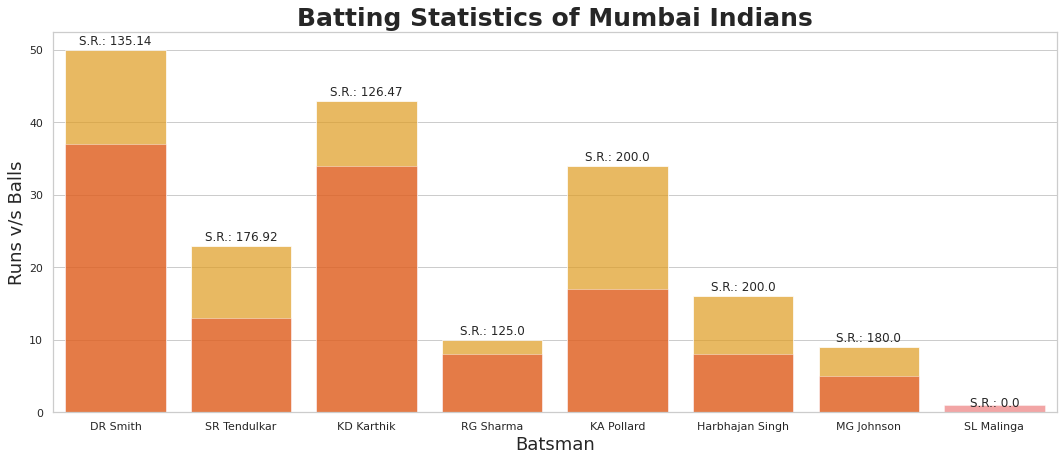

In [ ]:
show_batting_statistics(inning = 1)

***Nice!*** Now we know how each batsman performed in the inning. But, how much each batsman contributed in the inning is not very clear from the bar graph. This can be better visualized through the following Pie plot. <u>It gives you the exact contribution of each batsman in the inning.</u>


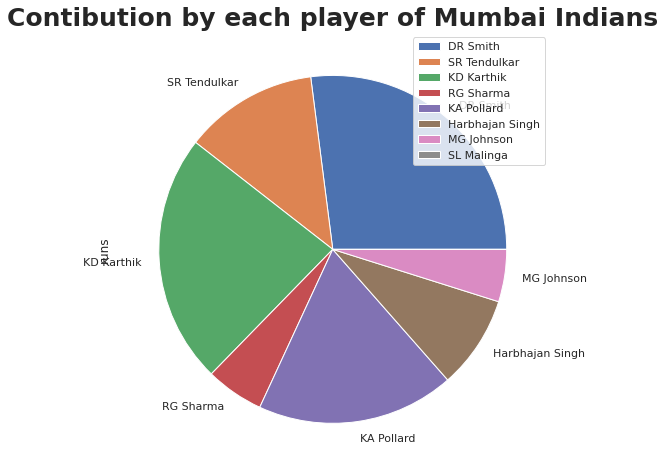

In [ ]:
batting_contribution(inning = 1)

*Let’s plot the same graphs for the next inning and have a look at the <u>opponent team's performance.</u>*


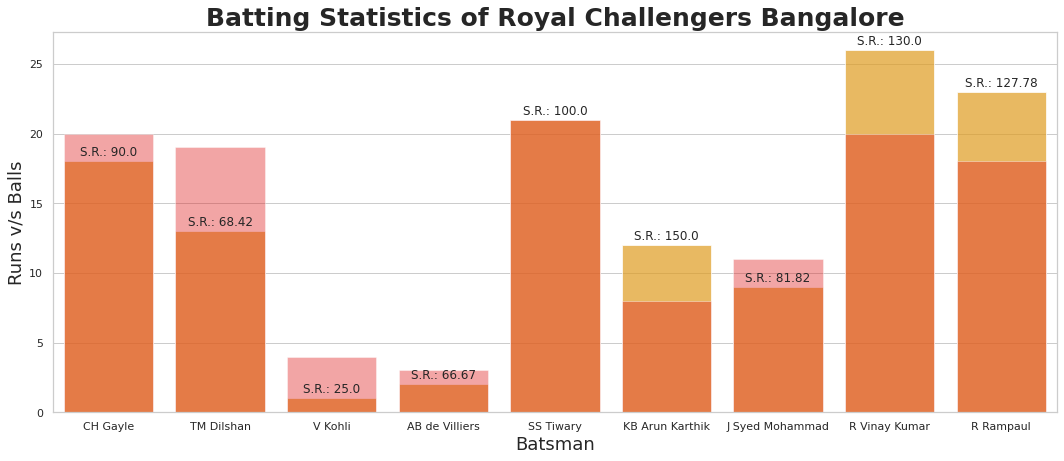

In [ ]:
show_batting_statistics(inning = 2)

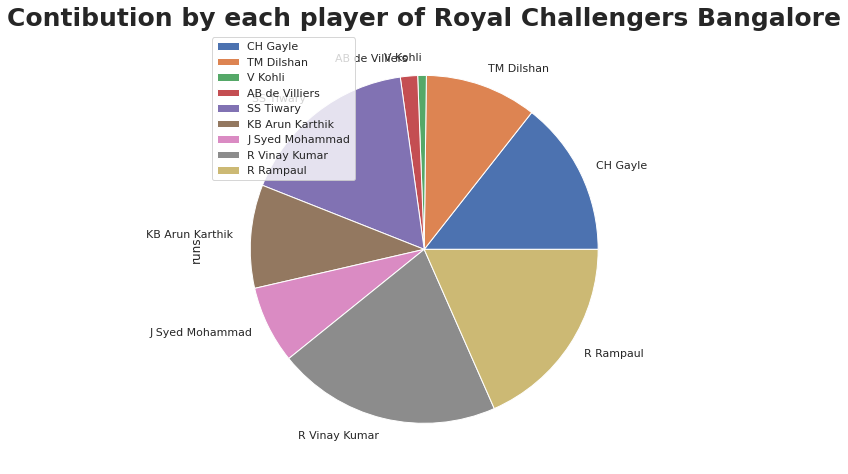

In [ ]:
batting_contribution(inning = 2)

***Awesome!*** Here we are done with the batting side performance of the match but what about the bowlers? Let’s plot the same graphs for bowlers as well to see how economical a bowler is for the team and how many wickets he took in the match.

## **Bowling Statistics**
---
These graphs can clearly give you an idea of who bowled well in an inning. It consists of a pair of bars  of two seperate colours. It can be explained as follows:

**Dark Brown** - Total runs given by the bowler

**Red** - Economy of the bowler

**Bar type:**

> **Dark Brown and Red**: Economy is more than the runs given by the bowler.

> **Red and Grey**: Economy is less than the runs given by the bowler.

> **Only Brown**: Economy is equal to the runs given by the bowler.

> **Only Red**: No run given by the bowler.




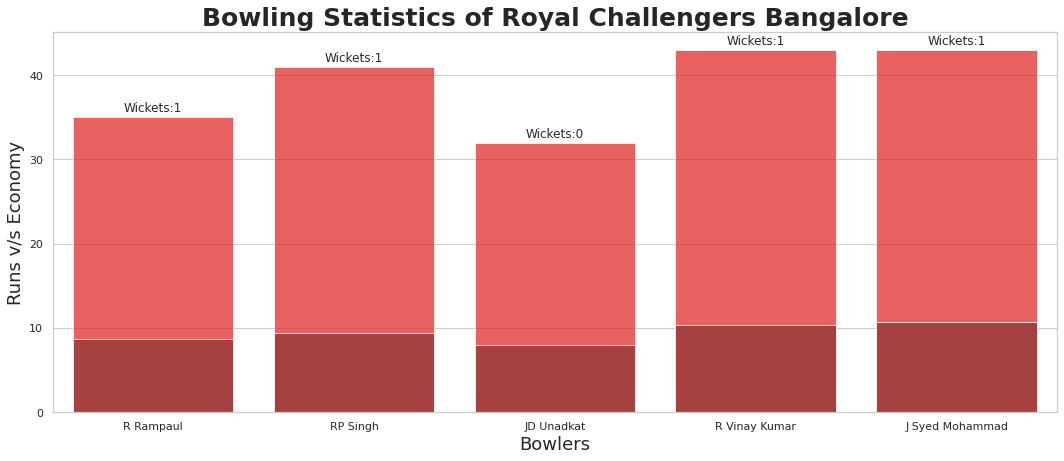

In [ ]:
bowling_statistics(inning = 1)

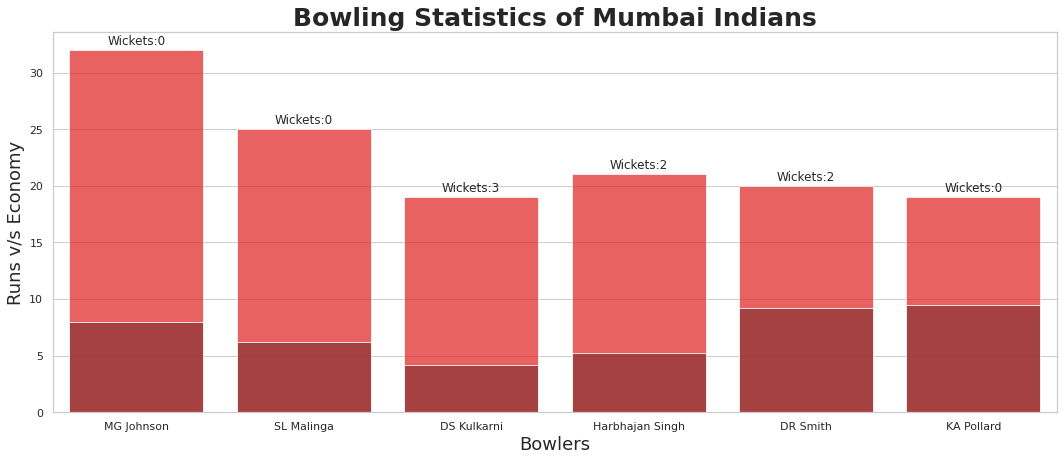

In [ ]:
bowling_statistics(inning = 2)

## **Runs Per Over**
---
***Great!*** So, we saw how each batsman and bowler played in an innings. Now let’s see how the whole team played in an inning. Let’s plot another bar graph of runs scored by the teams in each over for both the innings, separately, and let’s see which is the most expensive over in the inning and the overs in which bowlers took wickets.


> ‘ <b>*</b> ’  denotes the wicket fall in a particular over.

> Bar height gives the runs scored in an over.


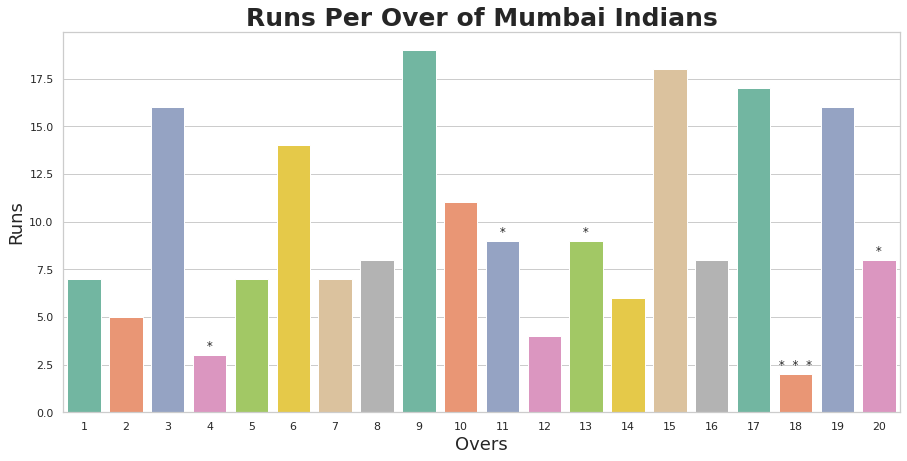

In [ ]:
runs_per_over(inning = 1)

We have compared each batsman’s performance with their teammates but what about the batsmans of the opponents team? So, let’s compare that as well.

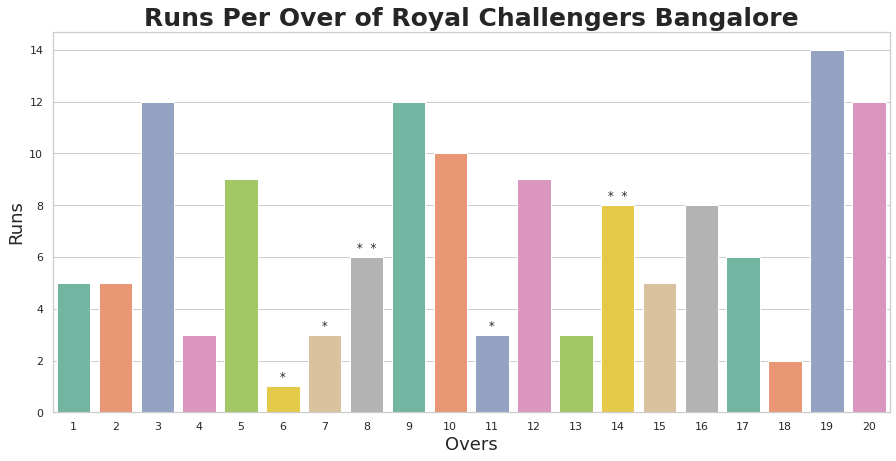

In [ ]:
runs_per_over(inning = 2)

## **Scoring Rates**
---
Let’s draw a bubble(scatter) plot for this comparison. Here, <u>the colour differentiates the team</u> and the <u>size of the circles denotes the strike rate of a batsman.</u>

In [ ]:
scoring_rates()

## **Manhattan**

---

 Till now, we have seen the player’s and team’s performances individually. Now, it's time to compare the team's performance with each other. Manhattan is the best way to compare team’s performance per over with each other and their wickets fall.

<Figure size 1080x504 with 0 Axes>

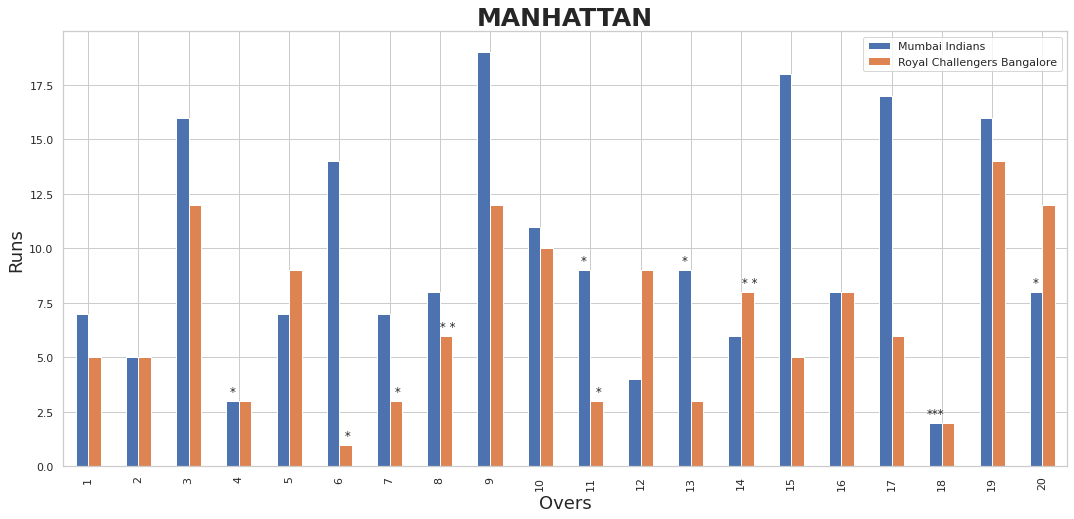

In [ ]:
manhattan()

## **Run Rate**

---


When we talk about team’s performance, how can we forget the most famous graph in the world of cricket i.e. The run rate graph. It is a complete summary of the entire match.

Run rate graph is a combination of two plots, i.e. scatter and line plot, in which scatter points show the wickets fall and the line shows the runs scored by the team.

Even, if no information is given to you about the match, then also this graph alone is self sufficient to give you the glimpse of the entire match. Let’s look at the graph and see if you can identify who won and who lost!


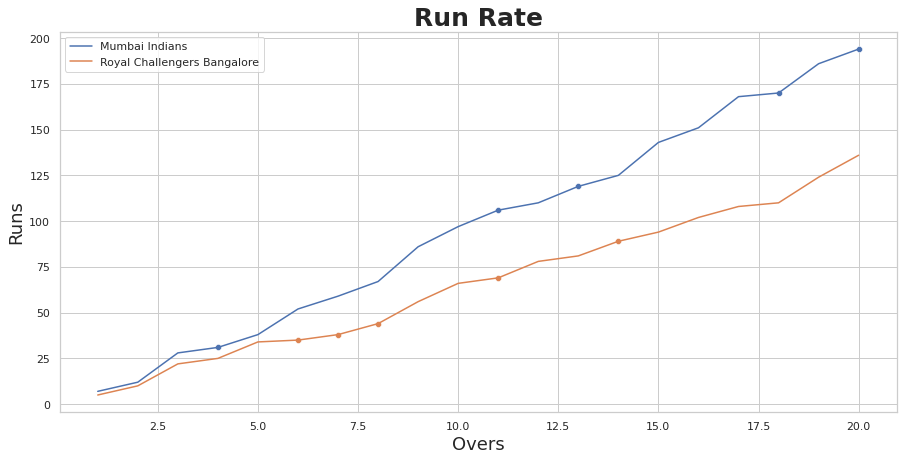

In [ ]:
run_rate()

## **Match Result**

---

 *Can you identify who won the match? I hope so! Let’s look at the result now.*

In [ ]:
print('\033[1;32;34m########'*4+'\n     <<<< MATCH RESULT >>>>\n'+'********'*4)
match_result()

################################
     <<<< MATCH RESULT >>>>
********************************


,Result
DL Applied,No
Winner,Mumbai Indians
Loser,Royal Challengers Bangalore
Win By,58 Runs
Tied,No


#**Season Wise Team Analysis**



In [ ]:
#provides the points df for a season
def get_points_df():
    df = matches_df[matches_df['Season']==season].iloc[:-2] # leaving last two matches i.e. final and semifinal
    df = df.groupby('winner').agg({'id':'count'}).rename(columns={'id':'matches_won'}).reset_index()
    points = [val*2 for val in df['matches_won']]
    team_points_df = pd.concat([df,pd.DataFrame({'points':points})],axis=1)
    team_points_df.rename(columns={'winner':'team_name'}, inplace=True)
    return team_points_df

#makes points df and season global and returns sorted points table 
def get_points_table(ipl_season):
    if ipl_season=='Select Season':
        print('Please select a season!')
        return None
    elif int(ipl_season) > 2019:
        print('Sorry, Data Not Avaliable!')
        return None

    ipl_season = int(ipl_season)
    print('\n\033[1mIPL Seaon:',ipl_season)

    global season
    season = ipl_season

    global points_df
    points_df = get_points_df()
    points_df.sort_values(by='points',ascending=False)
    
    return points_df

In [ ]:

def match_deliveries_df():
    return pd.merge(matches_df[['id','Season']],deliveries_df,how='inner',left_on='id',right_on='match_id')
   
def get_batsman_runs_data():
    runs_by_season_df = match_deliveries_df().groupby(by=['Season','batting_team','batsman']).agg({'batsman_runs':'sum','ball':'count'}).sort_values(by='batsman_runs',ascending=False).reset_index()

    sns.set_theme(style="whitegrid")
    sns.set_color_codes("pastel")
    f,ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x="batsman_runs", y="batsman", data=runs_by_season_df[runs_by_season_df['Season']==season].head(10),
                label="runs", color="#f57f14")

    sns.set_color_codes("muted")
    sns.barplot(x="ball", y="batsman", data=runs_by_season_df[runs_by_season_df['Season']==season].head(10),
                label="balls", color="#faa457")

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set_title(f'Batsman Performance in {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    ax.set_ylabel("Batsman", fontsize=18)
    ax.set_xlabel("Runs and Balls", fontsize=18)
    sns.despine(left=True, bottom=True)

In [ ]:
def get_bowler_wickets_data():
    tmp_df = match_deliveries_df()
    deliveries_per_bowler_df = tmp_df.groupby(by=['Season','bowling_team','bowler']).agg({'ball':'count'}).rename(columns={'ball':'deliveries'}).reset_index()
    overs = []

    for x in deliveries_per_bowler_df['deliveries']:
        if x%6 == 0:
            overs.append(x//6)
        else:
            overs.append(float(str(x//6)+'.'+str(x%6)))

    deliveries_per_bowler_df['overs']= overs
    tmp_df2 = tmp_df[(tmp_df['dismissal_kind']!='run out') & (tmp_df['dismissal_kind']!='retired hurt') & (tmp_df['dismissal_kind']!= 'obstructing the field') & (~tmp_df['dismissal_kind'].isna())]
    wickets_df = tmp_df2.groupby(by=['Season','bowling_team','bowler']).agg({'player_dismissed':'count'}).rename(columns={'player_dismissed':'wickets'}).sort_values(by='wickets',ascending=False).reset_index()
    wickets_df = pd.merge(wickets_df,deliveries_per_bowler_df,how='inner')
    
    sns.set_theme(style="whitegrid")
    sns.set_color_codes("pastel")
    f,ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x="overs", y="bowler", data=wickets_df[wickets_df['Season']==season].head(10),
                label="overs", color="violet")

    sns.set_color_codes("colorblind")
    sns.barplot(x="wickets", y="bowler", data=wickets_df[wickets_df['Season']==season].head(10),
                label="wickets", color="purple")

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set_title(f"Bowler Performance in {season}", fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    ax.set_ylabel("Bowler", fontsize=18)
    ax.set_xlabel("Wickets and Overs", fontsize=18)

    sns.despine(left=True, bottom=True)

In [ ]:
def get_team_stadium_win_lose(season, team_ground_win_lose_dict ):
  season_match_df = matches_df[matches_df['Season'] == season]
  for index, rows in season_match_df.iterrows():
    winner = rows['winner']
    loser = rows['team1'] if winner != rows['team1'] else rows['team2']
    venue = rows['venue']

    if winner in team_ground_win_lose_dict:
      if venue in team_ground_win_lose_dict[winner]:
        team_ground_win_lose_dict[winner][venue][0] += 1 
      else:
        team_ground_win_lose_dict[winner][venue] = [1,0]  
    else:
      team_ground_win_lose_dict[winner] = {venue:[1,0]}

    if loser in team_ground_win_lose_dict:
      if venue in team_ground_win_lose_dict[loser]:
        team_ground_win_lose_dict[loser][venue][1] += 1 
      else:
        team_ground_win_lose_dict[loser][venue] =[0,1]  
    else:
      team_ground_win_lose_dict[loser] = {venue:[0,1]}
  

  return team_ground_win_lose_dict


def get_team_ground_analytics(season_team_ground_win_lose_dict):
  if np.nan in season_team_ground_win_lose_dict:
        season_team_ground_win_lose_dict.pop(np.nan)

  team_ground_win_dict = {}
  team_ground_lose_dict = {}
  team_ground_win_percent_dict = {}

  for team in season_team_ground_win_lose_dict:
    grounds_dict = season_team_ground_win_lose_dict[team]
  
    ground_win = grounds_dict.copy()
    ground_lose = grounds_dict.copy()
    ground_win_percent = grounds_dict.copy()
    ground_total_played = grounds_dict.copy()

    for ground in grounds_dict: 
      win_lose = grounds_dict[ground]
      win_percent = round((win_lose[0]*100)/(win_lose[0]+win_lose[1]),2)
      ground_win[ground] = win_lose[0]
      ground_lose[ground] = win_lose[1]
      ground_win_percent[ground] = win_percent

    team_ground_win_dict[team] = ground_win
    team_ground_lose_dict[team] = ground_lose
    team_ground_win_percent_dict[team] = ground_win_percent

  return team_ground_win_dict, team_ground_lose_dict, team_ground_win_percent_dict


def plot_season_ground_win_matches():
    team_stadium_win_lose_dict = get_team_stadium_win_lose(season, team_ground_win_lose_dict = {})
    season_win_dict = get_team_ground_analytics(team_stadium_win_lose_dict)[0]
    season_win_df = pd.DataFrame(season_win_dict)
    
    ax = season_win_df.set_index(season_win_df.index).plot(figsize=(18,8), kind='bar', title=f'Number of matches Won by teams on stadium in the year {season}', stacked=True, fontsize = 14)
    ax.set_title(f'No. of Matches won by a Team on a Ground in IPL {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    plt.xlabel('Ground Name', fontsize=18)
    plt.ylabel('Number of Matches Won', fontsize=18)


def plot_season_ground_lose_matches():
    team_stadium_win_lose_dict = get_team_stadium_win_lose(season, team_ground_win_lose_dict ={})
    season_lose_dict = get_team_ground_analytics(team_stadium_win_lose_dict)[1]

    season_lose_df = pd.DataFrame(season_lose_dict)
    ax = season_lose_df.set_index(season_lose_df.index).plot(figsize=(18,8),kind='bar', title=f'Number of matches Lost by teams on stadium in the year {season}', stacked=True, fontsize = 14)
    ax.set_title(f'No. of Matches lost by a Team on a Ground in IPL {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    plt.xlabel('Ground Name', fontsize=18)
    plt.ylabel('Number of Matches Lost', fontsize=18)



In [ ]:
def plot_india_heat_map(map_state_df, column_name):
  fig, ax = plt.subplots(1, figsize=(13, 13))
  ax.axis('on')
  ax.set_title(f'Team Performance in {season}', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
  map_state_df.plot(column=column_name, cmap='YlOrRd' ,linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_facecolor('skyblue')

# for team return their respective state
def get_state( team_name):
  team_state_dict = {'Kochi Tuskers Kerala':'Kerala',
  'Gujarat Lions':'Gujarat',
  'Rising Pune Supergiant': 'Maharashtra',
  'Chennai Super Kings':'Tamil Nadu',
  'Rajasthan Royals':'Rajasthan',
  'Mumbai Indians':'Maharashtra',
  'Kings XI Punjab':'Punjab',
  'Sunrisers Hyderabad':'Telangana',
  'Kolkata Knight Riders':'West Bengal',
  'Royal Challengers Bangalore':'Karnataka',
  'Delhi Capitals':'NCT of Delhi' }

  return team_state_dict[team_name] if team_name in team_state_dict else np.nan

# for team return their respective district, team which do not belong to a district return state instead
def get_district( team_name):
  team_city_dict = {'Kochi Tuskers Kerala':'Ernakulam',
  'Gujarat Lions':'Gujarat',
  'Rising Pune Supergiant': 'Pune',
  'Chennai Super Kings':'Chennai',
  'Rajasthan Royals':'Rajasthan',
  'Mumbai Indians':'Greater Bombay',
  'Kings XI Punjab':'Punjab',
  'Sunrisers Hyderabad':'Hyderabad',
  'Kolkata Knight Riders':'Kolkatsa',
  'Royal Challengers Bangalore':'Bangalore Urban',
  'Delhi Capital':'NCT of Delhi' }

  return team_city_dict[team_name] if team_name in team_city_dict else np.nan


def get_india_map_visualization(column_name):
    team_city_dict = {
        'Kochi Tuskers Kerala':'Kerala',
        'Rising Pune Supergiant': 'Maharashtra',
        'Chennai Super Kings':'Tamil Nadu',
        'Mumbai Indians':'Maharashtra',
        'Sunrisers Hyderabad':'Telangana',
        'Kolkata Knight Riders':'West Bengal',
        'Royal Challengers Bangalore':'Karnataka',
        }

    updated_points_state_df = points_df.copy()
    updated_points_district_df = points_df.copy()

    list_of_city = ['Pune','Ernakulam', 'Chennai', 'Greater Bombay', 'Hyderabad', 'Kolkata', 'Bangalore Urban']
    # select only those cities whose respective team participated in any IPL
    city_df = map_district_df[map_district_df['NAME_2'].isin(list_of_city)]

    updated_points_state_df['place_name'] = updated_points_state_df.apply(lambda x: get_state(x['team_name']), axis=1)
    updated_points_district_df['place_name'] = updated_points_district_df.apply(lambda x: get_district(x['team_name']) , axis=1)

    # concat points of state and district to make a signle dataframe for points
    points_combined = pd.concat([ updated_points_district_df, updated_points_state_df], ignore_index=True)

    new_city_df = city_df[['NAME_2', 'geometry']].rename(columns= {'NAME_2':'st_nm'})
   
    map_combined = pd.concat([map_state_df, new_city_df])

    map_combined.rename(columns={'st_nm':'place_name'}, inplace = True)

    # if nan is present in final data then boundary of that city or district will not be visible, so we replaced na with 0
    merged = map_combined.merge(points_combined, how='left', on='place_name').fillna(0)

    # taking only those teams which belong to a particular city instead of state in current season
    teams_new = [team_city_dict[i] for i in updated_points_district_df['team_name'] if i in team_city_dict.keys()]

    # in order to differentiate city from state decrease state points if a team belong to a city instead of state
    merged['points'] = merged.apply(lambda x:(x[4]-3) if x[0] in teams_new else x[4], axis = 1)
   
    # take index remove place which are city and whose points are negative
    index_names = merged[(merged['place_name'].isin(list_of_city)) & (merged['points'] <= 0.0)].index
    merged.drop(index_names, inplace = True)

    plot_india_heat_map(merged, 'points')



## **Points Table**

---


We all know that every team in IPL gives their best to make their position onto the **Leader Board** or in other way the **Points table**.

Moving Forward, let's take a look at the **Points table** of a season and analyze the performance of various teams.

### **Select a season**

In [ ]:
Season = "2011" #@param ["Select Season", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

In [ ]:
get_points_table(Season)


IPL Seaon: 2011


,team_name,matches_won,points
0,Chennai Super Kings,10,20
1,Delhi Capitals,4,8
2,Kings XI Punjab,7,14
3,Kochi Tuskers Kerala,6,12
4,Kolkata Knight Riders,8,16
5,Mumbai Indians,9,18
6,Rajasthan Royals,6,12
7,Rising Pune Supergiant,4,8
8,Royal Challengers Bangalore,10,20
9,Sunrisers Hyderabad,6,12


This Points table includes the number of matches won by each team and their corresponding points leading you to understand the position of team on the leader board.

## **Batsman Performance**

---

Here, we defined get_batsman_runs_data function() which gives the various batsman performance in a season which includes their runs and number of balls faced.

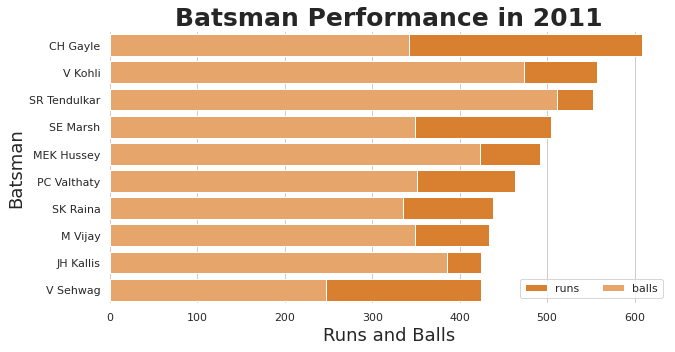

In [ ]:
get_batsman_runs_data()

From the above graph, we can see the stats of the **top 10 batsman of this season**.

This shows the runs and number of balls faced by the top 10 batsman of this season.

Based on this graph we can conclude the **orange cap** winner of the season.

    



## **Bowler Performance**

---
Here, we defined get_bowler_wickets_data() function which gives the various bowler performance in a season which includes their wickets taken over the number of overs they bowled.

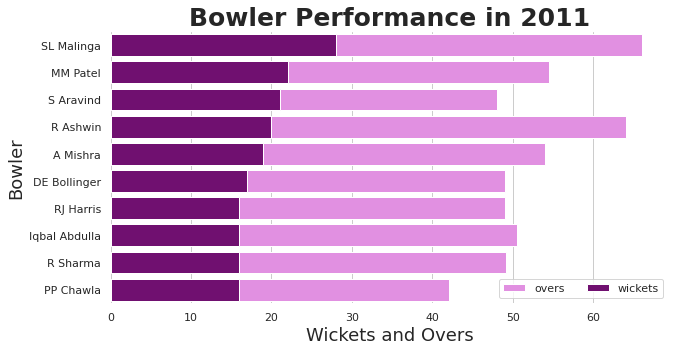

In [ ]:
get_bowler_wickets_data()

 Here we can see the stats of the **top 10 bowlers of this season**.

This shows the wickets and number of overs delivered by the top 10 batsman of this season.

Based on this graph we can conclude the **purple cap** winner of the season.


## **Team Performance in a Season**

---

So, we now know about the performance of batsman and bowler in a season, now we will look into the performance of teams over different grounds. By performance we mean the number of matches won or number of matches lost by different teams in different grounds in a complete season.


### **Number of Matches won by a Team on a Ground in a Season**

---

**plot_season_ground_win_matches()**: The stacked graph shown below shows the number of matches won by different  teams in different stadiums. We used colored stacked graphs so that you can easily identify the team who won maximum matches in any particular stadium. 

For instance if the orange colour belongs to Mumbai Indians you can easily look into the graph where a bar has the longest length of orange stack and that ground will be the maximum winning ground of Mumbai Indians in that particular season.


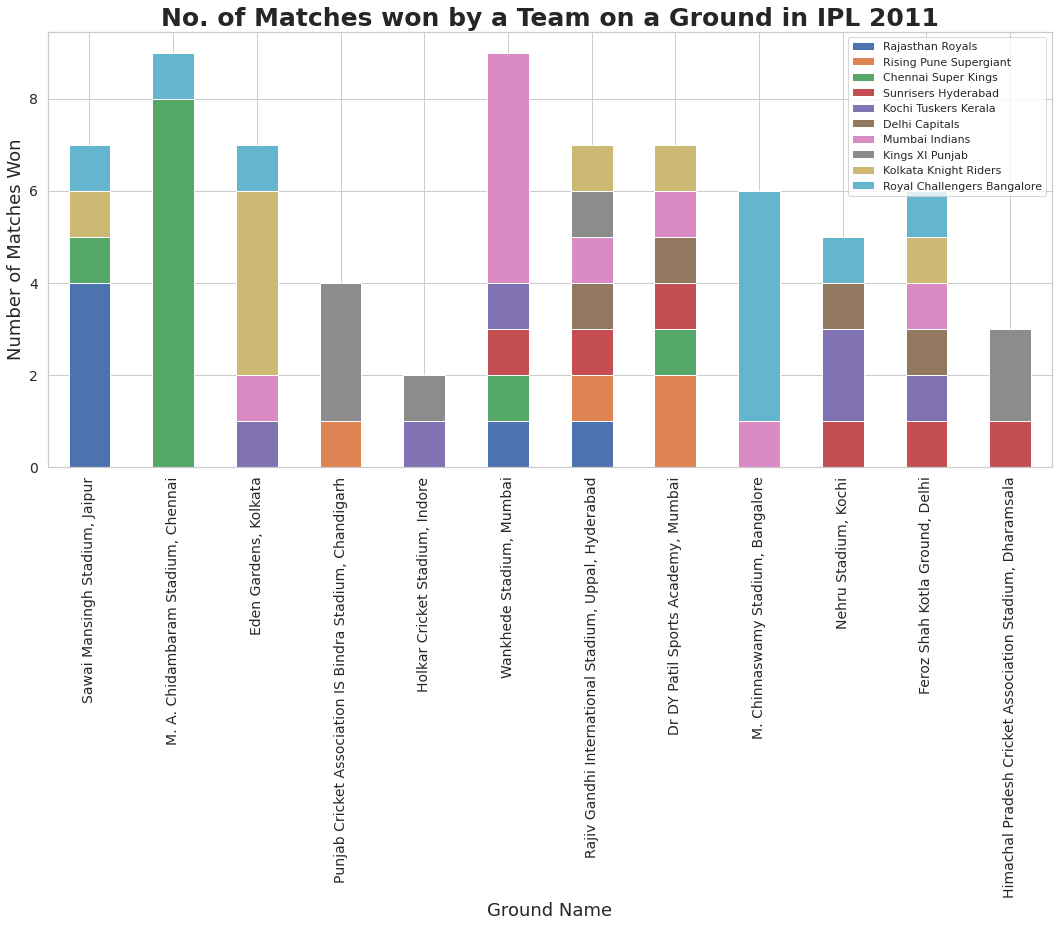

In [ ]:
plot_season_ground_win_matches()

### **Number of Matches lost by a Team on a Ground in a Season**

---


**plot_season_ground_lose_matches()**:Like the above graph this graph shows the number of matches lost by different teams in different stadiums.


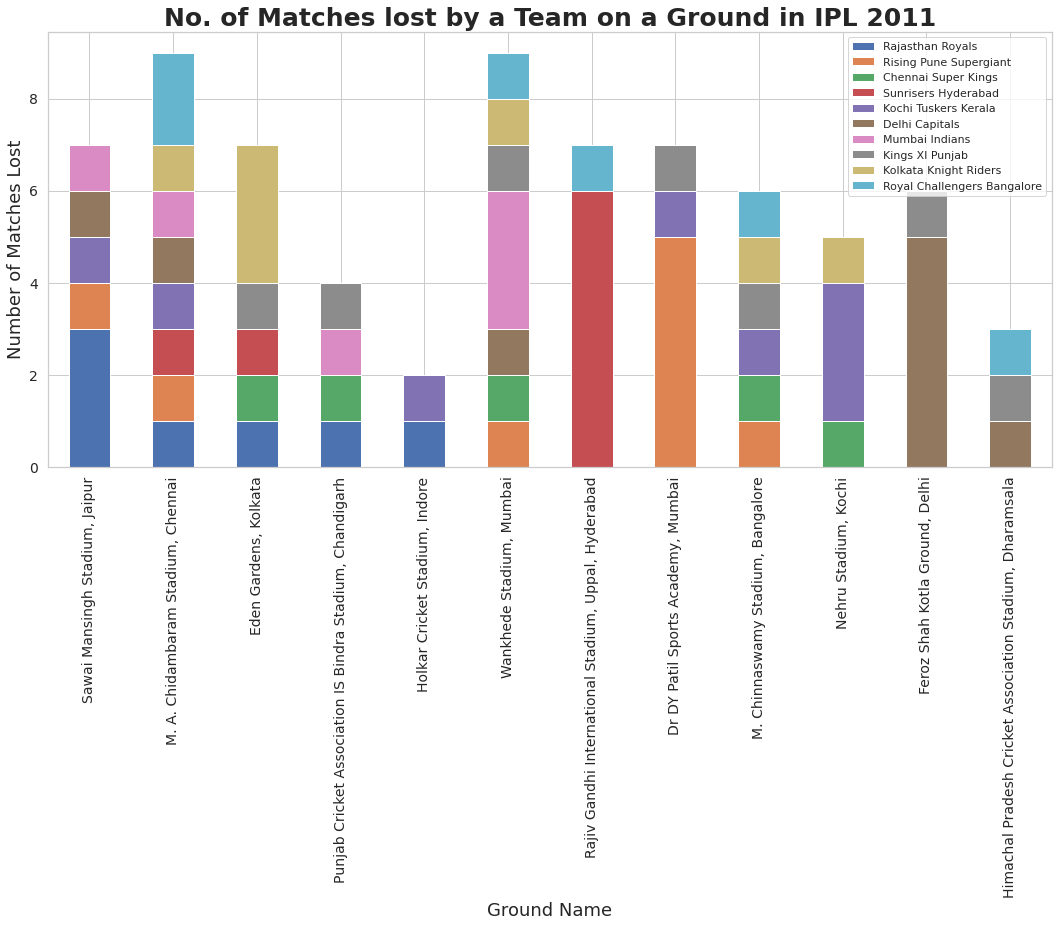

In [ ]:
plot_season_ground_lose_matches()

### **Team Performance Representation through Heat Map**

---

**get_india_map_visualization('points'**):Earlier, you have seen a dataframe which shows the points made by teams in an IPL season. Now to visualize it, we plotted the heat map on India map and for that we used geopandas to read two shapefiles, one for state boundaries and other for city boundaries.

Here, we are taking only those cities or states who played in the selected season, and colored them.

But, there is a possibility that multiple cities from same state might be corresponding to different teams in a season, so in order to differentiate the color of city with state, we decreased the points of state to which the city belongs to, so that state’s color would be a bit lighter than the city’s color.


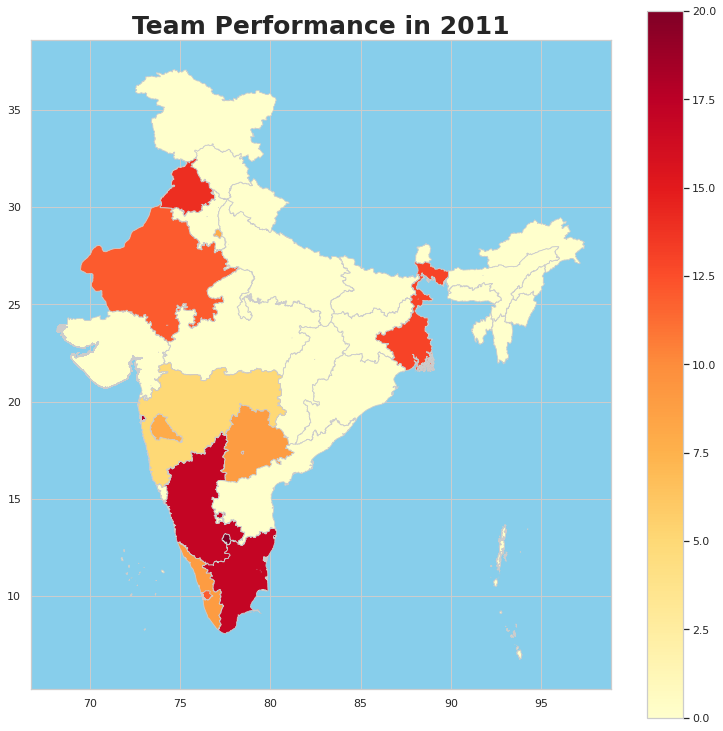

In [ ]:
get_india_map_visualization('points')

#**Entire IPL Analysis**

In [ ]:
#shows the penetration of players from different countries in IPL
def penetration_from_countries():
    n_players_from_country_df = players_df.groupby('Country', as_index=False).agg({'Player_Name':'count'})
    n_players_from_country_df.rename(columns={'Player_Name': 'no_of_players'},inplace=True)
    n_players_from_country_df.drop(n_players_from_country_df[n_players_from_country_df['Country']=='NA'].index, inplace = True)

    fig = px.pie(n_players_from_country_df, values='no_of_players', names='Country', title='<b>Contribution in IPL from each country</b>')
    fig.update_layout(title_font=dict(size=18))
    fig.show()

In [ ]:
def get_most_runs_avg_sr_gph(df):
  
  fig = go.Figure(data=[
      go.Bar(name='Total Runs', x=df.batsman, y=df.total_runs),
      go.Bar(name='Strikerate', x=df.batsman, y=df.strikerate),
      go.Bar(name='Average', x=df.batsman, y=df.average)
  ], layout=go.Layout(
        title=go.layout.Title(text="<b>Most Eligible Batsman Based On Total Runs Scored, Average Runs Scored and Strike Rate</b>",font=dict(size=20))
    ))
  fig.update_layout(barmode='group',
                    xaxis_title="Batsman",
                    yaxis_title="Total Runs / Average Runs / Strike Rate")
  fig.update_xaxes(title_font=dict(size=18))
  fig.update_yaxes(title_font=dict(size=18))
  fig.show()



def get_most_runs_avg_sr_data():
  
    if Total_Runs & Strikerate & Average:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by=['total_runs','average','strikerate'],ascending=False).head(top))
    elif Total_Runs & Strikerate:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by=['total_runs','strikerate'],ascending=False).head(top))
    elif Total_Runs & Average:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by=['total_runs','average'],ascending=False).head(top))
    elif Strikerate & Average:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by=['strikerate', 'average'],ascending=False).head(top))
    elif Total_Runs:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by='total_runs',ascending=False).head(top))
    elif Strikerate:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by='strikerate',ascending=False).head(top))
    elif Average:
        get_most_runs_avg_sr_gph(most_runs_avg_sr_df.sort_values(by='average',ascending=False).head(top))


In [ ]:
def get_player_of_match_data():
    player_of_match_df = matches_df.groupby(by='player_of_match').agg({'id':'count'}).rename(columns={'id':'no_of_times'}).sort_values(by='no_of_times',ascending=False).reset_index()
   
    # df will contain two columns(player_of_match and player_name ) with same detail , so, droping one of the two
    df= pd.merge(player_of_match_df,players_df,how='inner',left_on='player_of_match',right_on='Player_Name').drop(columns='Player_Name').sort_values(by='no_of_times',ascending=False)
  
    fig = px.bar(df.head(52),x='player_of_match',y='no_of_times',color='no_of_times',hover_data=['Batting_Hand','Bowling_Skill','Country'],
                labels={'player_of_match':'Player of match','no_of_times':'No of times','Batting_Hand':'Batting Hand','Bowling_Skill':'Bowling Skill'},
                title="<b>Consolidated Player of the Match Data</b>")
    fig.update_layout(title_font=dict(size=25))
    fig.update_xaxes(title_font=dict(size=18))
    fig.update_yaxes(title_font=dict(size=18))

    fig.show()

In [ ]:
def get_teamwise_home_and_away_win_df():

    # merging teams with same names
    df = teamwise_home_and_away_df.groupby('team').sum().reset_index()

    df.home_win_percentage = (df.home_wins/df.home_matches)*100
    df.away_win_percentage = (df.away_wins/df.away_matches)*100

    return df

def teamwise_home_away_win():
    df = get_teamwise_home_and_away_win_df()    

    fig = px.scatter_3d(df, x='home_wins', y='home_matches', z='home_win_percentage', color='team', title='Teamwise Home Win',
                        hover_data=['team'], labels = {'team':'Team', 'home_wins': 'Home Wins','home_matches':'Home Matches',                                                     'home_win_percentage': 'Home Win Percentage'})
    fig.show()

    fig = px.scatter_3d(df, x='away_wins', y='away_matches', z='away_win_percentage', color='team', title='Teamwise Away Win',
                        hover_data=['team'], labels = {'team':'Team', 'away_wins': 'Away Wins','away_matches':'Away Matches',
                                                           'away_win_percentage': 'Away Win Percentage'})
    fig.show()


In [ ]:
def get_total_team_ground_win_lose_dict():
  season_teams_dict = {}
  seasons_arr = matches_df['Season'].unique()
  team_ground_win_lose_dict = {}
  
  # loop through all the season to get complete data of winning and loosing details of teams on ground
  for this_season in seasons_arr:
    team_win_lose_dict = get_team_stadium_win_lose(this_season, team_ground_win_lose_dict )
    season_teams_dict[this_season] = team_win_lose_dict

  return team_ground_win_lose_dict

total_team_ground_win_lose_dict = get_total_team_ground_win_lose_dict()

win_dict = get_team_ground_analytics(total_team_ground_win_lose_dict)[0]
lose_dict = get_team_ground_analytics(total_team_ground_win_lose_dict)[1]
win_percent_dict= get_team_ground_analytics(total_team_ground_win_lose_dict)[2]

win_df = pd.DataFrame(win_dict)
lose_df = pd.DataFrame(lose_dict)
win_percent_df = pd.DataFrame(win_percent_dict)

list_of_team_ground_win =[]
list_of_team_ground_lose =[]
list_of_team_ground_win_percent =[]

# iterating column wise to get maximum value of that column and its corresponding index
for index, item in win_df.iteritems():
  if win_df[index].dtype != 'object':
    list_of_team_ground_win.append({'team':index, 'ground':win_df[index].idxmax(), 'matches_won':item.max()})

# iterating column wise to get maximum value of that column and its corresponding index
for index, item in lose_df.iteritems():
  if lose_df[index].dtype != 'object':
    list_of_team_ground_lose.append({'team':index, 'ground':lose_df[index].idxmax(), 'matches_lose':item.max()})

# iterating column wise to get maximum value of that column and its corresponding index
for index, item in win_percent_df.iteritems():
  if win_percent_df[index].dtype != 'object' :
    list_of_team_ground_win_percent.append({'team':index, 'ground':win_percent_df[index].idxmax(), 'matches_won':item.max()})


team_ground_win_percent_df = pd.DataFrame(list_of_team_ground_win_percent).sort_values(by = 'matches_won')


In [ ]:
def plot_all_team_ground_win():
    team_ground_win_df = pd.DataFrame(list_of_team_ground_win).sort_values(by = 'matches_won')
    team_ground_win_df.sort_values(by = 'matches_won')

    sns.set(rc={'figure.figsize':(20,8)})
    ax = sns.barplot(data = team_ground_win_df,  x='ground', y = 'matches_won', hue = 'team', dodge = False)
    ax.set_xlabel('Ground', fontsize=18)
    ax.set_ylabel('Matches Won', fontsize=18)
    ax.set_title(label ='Maximum matches won by a team on any stadium in entire IPL', fontdict={'fontsize': '25', 'fontweight' : 'bold'})
    plt.xticks(rotation=90)

def plot_all_team_ground_lose():
    team_ground_lose_df = pd.DataFrame(list_of_team_ground_lose).sort_values(by = 'matches_lose')
    team_ground_lose_df.sort_values(by = 'matches_lose')

    sns.set(rc={'figure.figsize':(20,8)})
    ax = sns.barplot(data = team_ground_lose_df,  x='ground', y = 'matches_lose', hue = 'team' , dodge = False)
    ax.set_xlabel('Ground', fontsize=18)
    ax.set_ylabel('Matches Lost', fontsize=18)
    ax.set_title(label ='Maximum matches lost by a team on any stadium in entire IPL', fontdict={'fontsize': '25', 'fontweight' : 'bold'})

    plt.xticks(rotation=90)


In [ ]:
def plot_ground_lose_matches():
    sns.set(rc={'figure.figsize':(25.7,8.27)})
    ax = lose_df.set_index(win_df.index).plot(kind='bar', stacked=True)
    ax.set_xlabel('Ground Name', fontsize=18)
    ax.set_ylabel('Number of Matches Lost', fontsize=18)
    ax.set_title( label='Number of Matches lost by all teams on stadiums in entire IPL', fontdict={'fontsize': '25', 'fontweight' : 'bold'})

def plot_ground_win_matches():
    sns.set(rc={'figure.figsize':(25.7,8.27)})
    ax = win_df.set_index(win_df.index).plot(kind='bar', stacked=True)
    ax.set_xlabel('Ground Name', fontsize=18)
    ax.set_ylabel('Number of Matches Won', fontsize=18)
    ax.set_title(label ='Number of Matches Won by all teams on stadiums in entire IPL', fontdict={'fontsize': '25', 'fontweight' : 'bold'})


In [ ]:
 def venue_probability():   
    toss_winner_df = matches_df[['id','team1','team2','toss_winner','toss_decision','winner','venue']]

    # Store the number of times a team played at a particular ground
    venue_probability_df = toss_winner_df.groupby(toss_winner_df.venue, as_index= True).agg({'id':'count'})
    venue_probability_df.rename(columns={'id': 'total_matches_played'}, inplace=True)

    venue_probability_df['prob_win_batfirst'] = np.nan
    venue_probability_df['prob_lose_batfirst'] = np.nan
    venue_probability_df['prob_win_fieldfirst'] = np.nan
    venue_probability_df['prob_lose_fieldfirst'] = np.nan

    venues = toss_winner_df.venue.unique()

    # Calculating the win probability at each venue
    for venue in venues:
        bat_first_win = 0
        field_first_win = 0
        for index, row in toss_winner_df.iterrows():
            if venue == row.venue:
                if row['toss_decision'] == 'field':
                    if row['toss_winner'] == row['winner']:
                        field_first_win += 1
                    else:
                        bat_first_win += 1
                else:
                    if row['toss_winner'] == row['winner']:
                        bat_first_win += 1
                    else:
                        field_first_win += 1

                '''
                    Probability of winning = (no. of times a team won / total matches played)
                    Probability of losing = 1 - Probability of winning
                '''
                venue_probability_df.loc[venue,'prob_win_batfirst'] = round(bat_first_win/venue_probability_df.loc[venue,'total_matches_played'], 2)
                venue_probability_df.loc[venue,'prob_lose_batfirst'] = round(1 - venue_probability_df.loc[venue,'prob_win_batfirst'], 2)
                
                venue_probability_df.loc[venue,'prob_win_fieldfirst'] = round(field_first_win/venue_probability_df.loc[venue,'total_matches_played'],2)
                venue_probability_df.loc[venue,'prob_lose_fieldfirst'] = round(1 - venue_probability_df.loc[venue,'prob_win_fieldfirst'], 2)

    return venue_probability_df

# This function will return you a histplot which shows the over all winning probability of a team when batted or fielded first.
def winning_probability():
    
    venue_prob_df = venue_probability()

    fig, axes = plt.subplots(1, 2, sharex=True,figsize=(15, 5))
    fig.suptitle('Probability Density',fontsize=25,fontweight='bold')

    fig = sns.histplot(ax= axes[0],data = venue_prob_df.prob_win_batfirst)
    fig.set_xlabel('Probability of winning when Batted First', fontsize=18)
    fig.set_ylabel("Number of Venues", fontsize=18)

    fig = sns.histplot(ax= axes[1],data = venue_prob_df.prob_win_fieldfirst)
    fig.set_xlabel('Probability of winning when Fielded First',fontsize=18)
    fig.set_ylabel("Number of Venues",fontsize=18)

    return fig

# The below two functions will return you tehe bar graphs of winning probability at each ground.
def batted_first_winning_probability():
    venue_prob_df = venue_probability()
    fig = px.bar(venue_prob_df.sort_values('venue',ascending=True), y = venue_prob_df.index, x = 'prob_win_batfirst', 
                color='prob_win_batfirst', orientation='h', title = '<b>Probability of Winning when Batted first on Grounds</b>',
                height=800, labels = {'prob_win_batfirst': 'Probability', 'y': 'Ground'} )
    fig.update_layout(title_font=dict(size=25))
    fig.update_xaxes(title_font=dict(size=18))
    fig.update_yaxes(title_font=dict(size=18))
    return fig.show()


def fielded_first_winning_probability():
    venue_prob_df = venue_probability()
    fig = px.bar(venue_prob_df.sort_values('venue', ascending=False), y = venue_prob_df.index, x = 'prob_win_fieldfirst',
                color='prob_win_fieldfirst', orientation='h', title = '<b>Probability of Winning when Fielded first on Grounds</b>',
                height=800, labels = {'prob_win_fieldfirst': 'Probability', 'y': 'Ground'} )
    fig.update_layout(title_font=dict(size=25))
    fig.update_xaxes(title_font=dict(size=18))
    fig.update_yaxes(title_font=dict(size=18))
    return fig.show()

In [ ]:
def innings_score():
    
    # Store the total runs scored in the first inning.
    inning1_scores_each_match_df = deliveries_df[deliveries_df['inning']==1].groupby('match_id').agg({'total_runs':'sum'})

    # Average of total runs scored in the first inning.
    inning1_avg_score = round(inning1_scores_each_match_df.total_runs.sum()/len(inning1_scores_each_match_df), 2)

    # Store the total runs scored in the second inning.
    inning2_scores_each_match_df = deliveries_df[deliveries_df['inning']==2].groupby('match_id').agg({'total_runs':'sum'})

    # Average of total runs scored in the second inning.
    inning2_avg_score = round(inning2_scores_each_match_df.total_runs.sum()/len(inning2_scores_each_match_df), 2)

    return inning1_scores_each_match_df, inning2_scores_each_match_df, inning1_avg_score, inning2_avg_score


# This function will return you two histplots of score density for each innings. 
def innings_score_density():

    inni_score = innings_score()

    print('\033[1mAverage Score of Inning 1: ', inni_score[2],'\nAverage Score of Inning 2: ', innings_score()[3])

    fig, axes = plt.subplots(1, 2, sharex=True,figsize=(15, 5))
    fig.suptitle('Innings Score Density',fontsize=21,fontweight='bold')

    sns.histplot(ax= axes[0],data = inni_score[0].total_runs, kde=True, color='green')
    axes[0].set_title('Score Density of Inning 1',fontdict={'fontsize': '18', 'fontweight' : 'bold'})
    axes[0].set_xlabel('Scores', fontsize=18)
    axes[0].set_ylabel('Number of Matches',fontsize=18)

    sns.histplot(ax= axes[1],data = inni_score[1].total_runs, kde=True, color='black')
    axes[1].set_title('Score Density of Inning 2',fontdict={'fontsize': '18', 'fontweight' : 'bold'})
    axes[1].set_xlabel('Scores',fontsize=18)
    axes[1].set_ylabel('Number of Matches',fontsize=18)

    return fig.show()


# This function will return you two plots, i.e. KDE and scatter plot, which will show the total runs scored in each inning.
def score_density():

    inni_score = innings_score()
    inning_df = inni_score[0].merge(inni_score[1], how='inner',on='match_id')

    fig = plt.figure(figsize=(7,5))
    sns.set(style='dark',)
    fig = sns.kdeplot(data = inning_df, x='total_runs_x',y='total_runs_y',cmap='Purples_d',shade=True)
    fig.set_xlabel('Inning 1 Scores',fontsize=18)
    fig.set_ylabel('Inning 2 Scores',fontsize=18)

    fig = sns.jointplot(x = 'total_runs_x',y = 'total_runs_y',data = inning_df, kind='reg', height=7, color='skyblue')
    fig.set_axis_labels(xlabel = 'Inning 1 Scores',ylabel='Inning 2 Scores',fontsize=18)
    

In [ ]:
def min_max_runs_to_win(venue, inning):
    #venue = venues[venue_id]
    
    if inning not in [1,2]:
        print('Inning can only be 1 or 2. \nPlease enter the correct inning.')
        return None,None,None
 
    # Extract the id and win_by_runs column from matches_df dataframe.
    req_match_id_df_1 = matches_df[matches_df.venue == venue][['id','win_by_runs']]
    
    # Drop all the rows in which teams fielded first and won the match
    req_match_id_df_1.where(req_match_id_df_1.win_by_runs > 0, inplace=True) 
    req_match_id_df_1.dropna(inplace=True)
    
    # Create two columns to store the total runs scored when a team batted first and won/lost.
    req_match_id_df_1['bat_first_win'] = np.nan
    req_match_id_df_1['bat_second_lose'] = np.nan
    
    for id in req_match_id_df_1.id:
        
        # Extract the required columns from deliveries_df dataframe.
        temp_df = deliveries_df[deliveries_df.match_id == id][['match_id','total_runs','inning']]
 
        # Drop all the rows of second inning.
        temp_df.where(temp_df['inning']==1, inplace= True)
        temp_df.dropna(inplace = True)
 
        # Total runs scored by a team in the first inning and won the match.
        req_match_id_df_1['bat_first_win'][req_match_id_df_1.id == id] = temp_df[temp_df.match_id == id]['total_runs'].sum()
        
 
    for id in req_match_id_df_1.id:
 
        # Extract the required columns from deliveries_df dataframe.
        temp_df = deliveries_df[deliveries_df.match_id == id][['match_id','total_runs','inning']]
 
        # Drop all the rows of first inning.
        temp_df.where(temp_df['inning']==2, inplace= True)
        temp_df.dropna(inplace = True)
 
        # Total runs scored by a team in the second inning.
        req_match_id_df_1['bat_second_lose'][req_match_id_df_1.id == id] = temp_df[temp_df.match_id == id]['total_runs'].sum()
        
 
    req_match_id_df_1.drop(columns=['id','win_by_runs'],inplace = True)
 
    # Extract the id and win_by_wickets column from matches_df dataframe.
    req_match_id_df_2 = matches_df[matches_df.venue == venue][['id','win_by_wickets']]
 
    # Drop all the rows in which teams batted first and won the match
    req_match_id_df_2.where(req_match_id_df_2.win_by_wickets > 0, inplace=True)
    req_match_id_df_2.dropna(inplace=True)
 
    # Create two columns to store the total runs scored when a team batted first and won/lost.        
    req_match_id_df_2['bat_second_win'] = np.nan
    req_match_id_df_2['bat_first_lose'] = np.nan
 
    
    for id in req_match_id_df_2.id:
 
        # Extract the required columns from deliveries_df dataframe.
        temp_df = deliveries_df[deliveries_df.match_id == id][['match_id','total_runs','inning']]
 
        # Drop all the rows of first inning.
        temp_df.where(temp_df['inning']==2, inplace= True)
        temp_df.dropna(inplace = True)
 
        # Total runs scored by a team in the second inning and won the match.
        req_match_id_df_2['bat_second_win'][req_match_id_df_2.id == id] = temp_df[temp_df.match_id == id]['total_runs'].sum()
        
    for id in req_match_id_df_2.id:
 
        # Extract the required columns from deliveries_df dataframe.
        temp_df = deliveries_df[deliveries_df.match_id == id][['match_id','total_runs','inning']]
 
        # Drop all the rows of second inning.
        temp_df.where(temp_df['inning']==1, inplace= True)
        temp_df.dropna(inplace = True)
 
        # Total runs scored by a team in the first inning and won the match.
        req_match_id_df_2['bat_first_lose'][req_match_id_df_2.id == id] = temp_df[temp_df.match_id == id]['total_runs'].sum()
        
    req_match_id_df_2.drop(columns=['id','win_by_wickets'],inplace = True)
 
    
    if inning==1:
    
        # Bat First Scores
        req_matches_df = pd.concat([req_match_id_df_1.bat_first_win, req_match_id_df_2.bat_first_lose], ignore_index=True, axis=1)
        req_matches_df.rename(columns={0:'Bat First Win',1:'Bat First Lose'}, inplace=True)
 
        avg_score_inng = ((req_match_id_df_1['bat_first_win'].sum()/len(req_match_id_df_1.index)) + (req_match_id_df_2['bat_first_lose'].sum()/len(req_match_id_df_2.index)))/2
        
    
    else:
        
        # Bat Second Scores
        req_matches_df = pd.concat([req_match_id_df_2.bat_second_win, req_match_id_df_1.bat_second_lose], ignore_index=True, axis=1)
        req_matches_df.rename(columns={0:'Bat Second Win',1:'Bat Second Lose'}, inplace=True)
 
        avg_score_inng = ((req_match_id_df_2['bat_second_win'].sum()/len(req_match_id_df_2.index)) + (req_match_id_df_1['bat_second_lose'].sum()/len(req_match_id_df_1.index)))/2
        
 
    if len(req_match_id_df_1.index) < 2 and len(req_match_id_df_2.index) < 2:
            print('***'*3+' Not Enough Data to plot a graph! '+'***'*3)
            return None, None, None

    return (req_matches_df, venue, avg_score_inng)
 
        

# This returns the type of a pitch.
def pitch_type(score, inning):
    if inning>2:
        print('Enter a Correct Inning number. Inning number can only be 1 or 2!')
        return None
    
    if inning==1:
        return 'BATTING' if score > 172 else 'BOWLING' if score < 152 else 'NORMAL'
    else:
        return 'BOWLING' if score < 140 else 'BATTING' if score > 160 else 'NORMAL'


def match_result_analysis(venue, inning):

    if venue=='Select Venue':
        print('Please select a Venue!')
        return None
    elif inning=='Select Inning':
        print('Please Select an Inning!')
        return None
    
    inning = int(inning)

    print()

    sns.set_theme(style="whitegrid")

    ax = plt.figure(figsize=(10,5))

    min_max_runs_to_win_df, venue_name, avg_score_inng = min_max_runs_to_win(venue,inning)

    if venue_name != None:
        inn_dict = {1: 'First',2:'Second'}
        print('=========='*10,'\nAverage Runs Scored in',venue,'in', inn_dict[inning],'Inning is',round(avg_score_inng,2),
            "\nWhich implies that this Ground's pitch is a",pitch_type(avg_score_inng, inning),'pitch.','\n'+'=========='*10,'\n')
        
        # Plot a KDE plot
        ax = sns.kdeplot(data = min_max_runs_to_win_df, bw_adjust = 0.8, fill = True)

        ax.set_title('Win/Lose When Batted {} at {}'.format(inn_dict[inning], venue),fontdict={'fontsize':'22','fontweight':'bold'})
        ax.set_xlabel('Score')
               

        sns.set_theme(style="whitegrid")
        ax = plt.figure(figsize=(4,6))
        
        # Plot a Box plot
        ax = sns.boxplot(data = pd.melt(min_max_runs_to_win_df),y='value', x = 'variable')
        ax.set_xlabel('Bat {}'.format(inn_dict[inning]),fontsize=18)
        ax.set_ylabel('Runs Scored',fontsize=18)
        plt.show()


In [ ]:
def team_performance_at_ground(venue, team):

    if venue=='Select Venue':
        print('Please select the Venue!')
        return None
    elif team=='Select Team':
        print("Please select the Team!")
        return None

   
    req_match_ids = []
    team_a,team_b = None, None

    team_performance_df = pd.DataFrame(columns=['season', 'team1', 'team1_score','team1_wickets', 
                                                'team2', 'team2_score','team2_wickets','result', 'result_type'])

    for index, row in matches_df.iterrows():
        if row['venue'] == venue and (row['team1']==team or row['team2']==team) and row['dl_applied']==0:
            req_match_ids.append(row.id)
       
    
    for id in req_match_ids:
    
        # when team batted first
        if deliveries_df[deliveries_df['match_id']==id]['batting_team'].values[0] == team:
            team_a = team
            team_b = 'opposite_team'  # It doesn't matter who is in the opposition. We are interested in the team's performance.
        
        # when team fielded first
        else:
            team_a = 'opposite_team'  #  # It doesn't matter who is in the opposition. We are interested in the team's performance.
            team_b = team

        # Calculate the total teams score and the wickets fall.
        team_a_score = deliveries_df[(deliveries_df.match_id == id) & (deliveries_df.inning==1)]['total_runs'].sum()
        team_a_wickets_fall = sum([1 if x==x else 0 for x in deliveries_df[(deliveries_df.match_id == id) & (deliveries_df.inning==1)]['player_dismissed']])
        
        team_b_score = deliveries_df[(deliveries_df.match_id == id) & (deliveries_df.inning==2)]['total_runs'].sum()
        team_b_wickets_fall = sum([1 if x==x else 0 for x in deliveries_df[(deliveries_df.match_id == id) & (deliveries_df.inning==2)]['player_dismissed']])

       
        # Required team batted first
        if team_a == team:
            temp_df = {'season':matches_df[matches_df.id==id]['Season'].values[0],'team1': team_a, 'team1_score': team_a_score,'team1_wickets':team_a_wickets_fall,
                        'team2': team_b, 'team2_score': team_b_score,'team2_wickets':team_b_wickets_fall}
            
            # Required team won the match
            if team_a_score > team_b_score:
                temp_df['result'] = 'Won by {} runs'.format(team_a_score - team_b_score)
                temp_df['result_type'] = 'Won'
            
            # Required team lost the match
            else:
                temp_df['result'] = 'Lost'
                temp_df['result_type'] = 'Lost'
        
        # Required team fielded first
        else:
            temp_df = {'season':matches_df[matches_df.id==id]['Season'].values[0],'team1': team_a, 'team1_score': team_a_score,'team1_wickets':team_a_wickets_fall,
                        'team2': team_b, 'team2_score': team_b_score,'team2_wickets':team_b_wickets_fall}
            
            # Required team lost the match
            if team_a_score > team_b_score:
                temp_df['result'] = 'Lost'
                temp_df['result_type'] = 'Lost'
            
            # Required team won the match
            else:
                temp_df['result'] = 'Won by {} wickets'.format(10 - team_b_wickets_fall)
                temp_df['result_type'] = 'Won'
        
        # Append each match details into the dataframe
        team_performance_df = team_performance_df.append(temp_df, ignore_index=True)

    # Extract the details of matches when batted first.
    df1 = copy.deepcopy(team_performance_df[team_performance_df.team1==team])
    df1.sort_values('season',inplace=True)  # Sort by season

    fig1 = px.scatter(df1, x="season", y="team1_score", title="<b>{}'s Performances when Batted First at {}</b>".format(team, venue),hover_data=['team1_wickets','result'], color = 'result_type',
             color_discrete_map = {'Won':'blue','Lost':'red'},labels={'season':'Season','team1_score':'Score','team1_wickets':'Wickets','result':'Result', 'result_type': 'Result'})
    fig1.update_traces(mode="markers")
    fig1.update_layout(height=500,width=1200,title_font=dict(size=25))
    fig1.update_xaxes(title_font=dict(size=18))
    fig1.update_yaxes(title_font=dict(size=18)) 
    fig1.show()
    

    # Extract the details of matches when fielded first.
    df2 = copy.deepcopy(team_performance_df[team_performance_df.team2==team])
    df2.sort_values('season',inplace=True)  # Sort by season
  
    fig2 = px.scatter(df2, x="season", y="team2_score", title="<b>{}'s Performances when Fielded First at {}</b>".format(team,venue),hover_data=['team2_wickets','result'], color='result_type',
           color_discrete_map = {'Won':'blue','Lost':'red'} ,labels={'season':'Season','team2_score':'Score','team2_wickets':'Wickets','result':'Result', 'result_type': 'Result'})
    fig2.update_traces(mode="markers")
    fig2.update_layout(height=500,width=1200,title_font=dict(size=25)) 
    fig2.update_xaxes(title_font=dict(size=18))
    fig2.update_yaxes(title_font=dict(size=18)) 
    fig2.show()  

    return team_performance_df



This is the final part of our project. The analysis of players' performances, teams, teams w.r.t to grounds, the dependence of winning and losing of teams, players of the matches, etc on the basis of the entire IPL matches of our dataset. Let’s start our final analysis with the penetration of people from the entire world.

*We can look at the penetration of the players with the help of a pie plot. Without any further delay let’s plot it…*


In [ ]:
penetration_from_countries()

## **Batsman ranking based on total runs, average, strikerate**

**get_most_runs_avg_sr_data()**:Below barplot shows the batsman and there total runs,average runs and strike rate annd relation between these.

We observed that total runs have larger values comparative to average and strikerate, so for the convinence of plotting we divided the total runs of all players by 20.

 **Bar type:**


> **Blue Bar**: Shows the total runs scored by batsman

> **Red Bar**:Shows the strikerate of batsman

> **Green Bar**: Shows the average of batsman


The ***checkboxes*** are provisioned to sort the players on the basis of highest total runs, strikerate ,average and using the ***slider*** you can select the top best batsman. 

In [ ]:
Total_Runs = False #@param {type:"boolean"}
Strikerate = False #@param {type:"boolean"}
Average = True #@param {type:"boolean"}


Top = 10 #@param {type:"slider", min:0, max:516, step:1}
top=Top

In [ ]:
get_most_runs_avg_sr_data()

## **Player of the Match**
---
 Here, the get_player_of_match_data()  function builds a barplot which shows the details of a player in sorted order based on number of times they became player of the match in the IPL history.

From this graph we can find out the players who have been consistent performers in IPL.

In [ ]:
get_player_of_match_data()

## **Team-wise Home And Away Win**
---
Let's see how teams performed in their home ground and away grounds. For this, we used teamwise_home_and_away_df dataset and plotted a *3D-Scatter Plot* and compared the performance of different teams with each other.

In [ ]:
teamwise_home_away_win()

## **Most Favourable Ground for Teams**
---
The upcoming two colourful graphs will show you the maximum matches won and lost by a team on any ground which shows the most favourable and most unfavourable ground for teams.

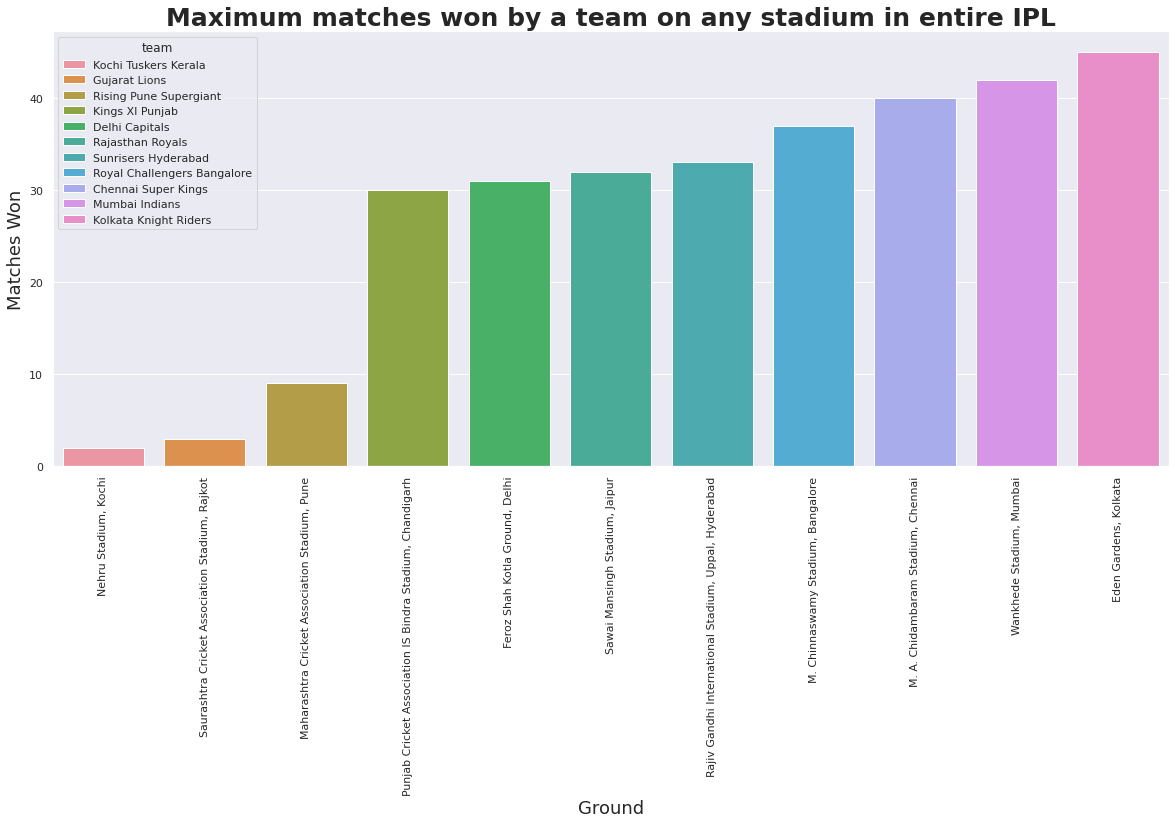

In [ ]:
plot_all_team_ground_win()

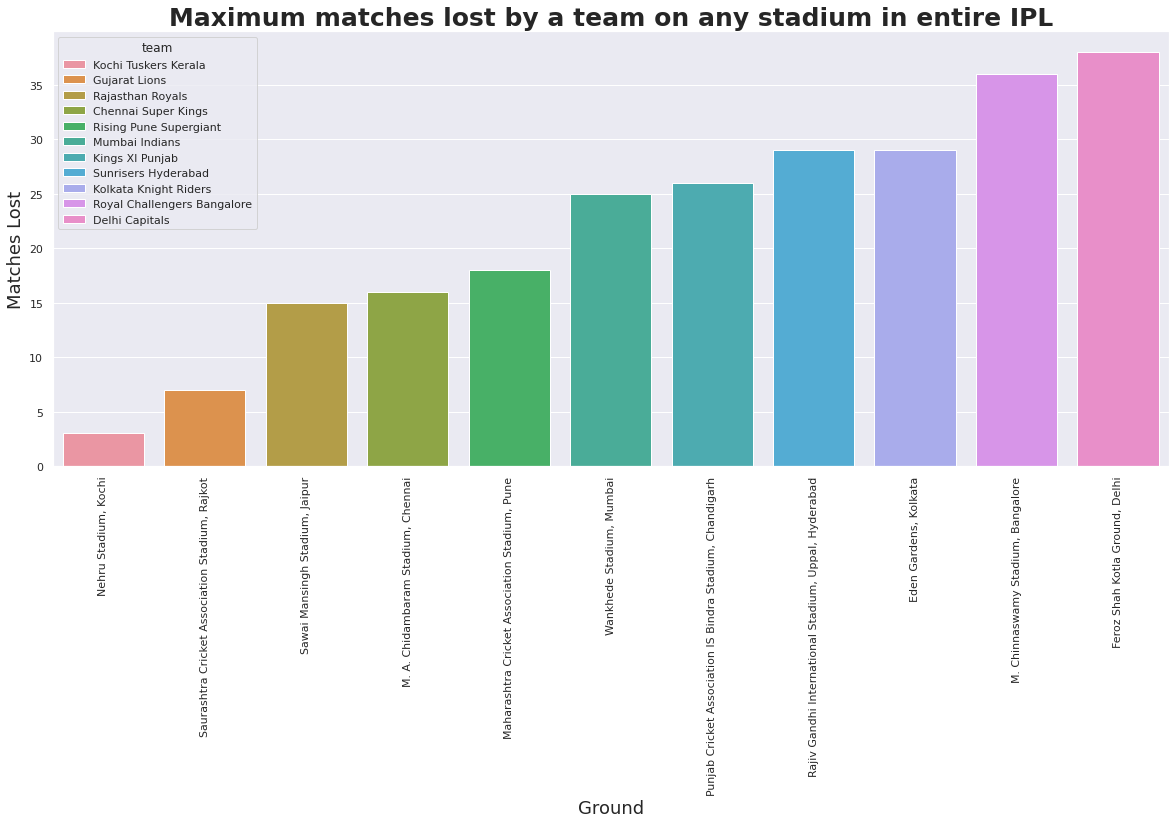

In [ ]:
plot_all_team_ground_lose()

## **Matches won by Teams on Multiple Stadiums**

---


**plot_ground_win_matches()**:You have seen a similar graph above for a particular season, now we took it to next level and created the stack graph for number of matches won by all team on stadiums over entire IPL lifetime till date.



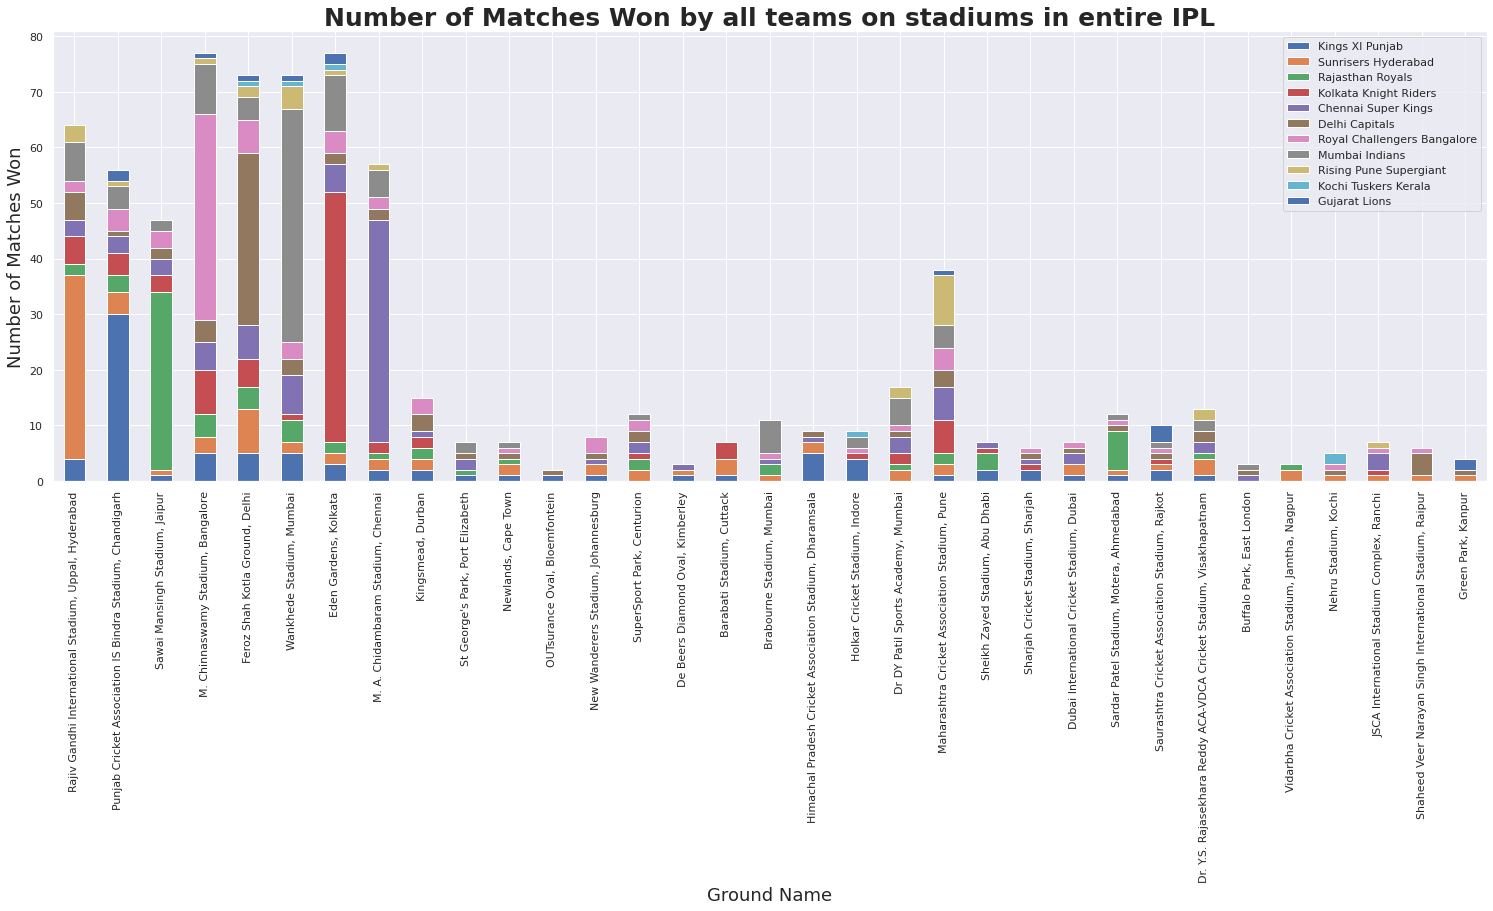

In [ ]:
plot_ground_win_matches()

## **Matches lost by Teams on Multiple Stadiums**

---
**plot_ground_lose_matches()**:Like above graph a similar plot is created for number of matches lost by all team on stadiums over entire IPL lifetime till date.

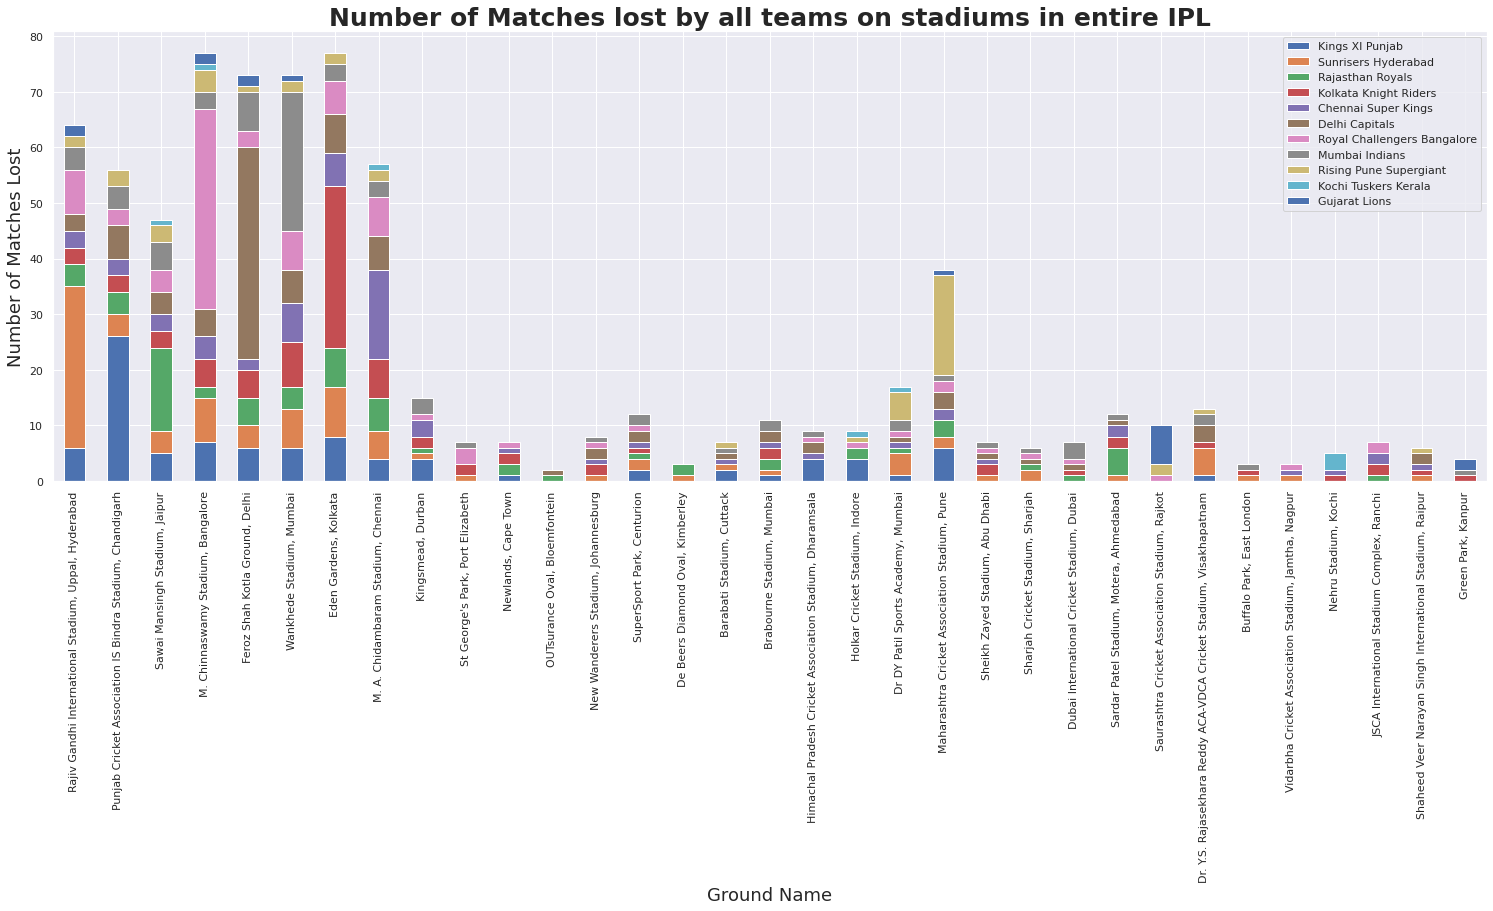

In [ ]:
plot_ground_lose_matches()

## **Winning Probability**
---

**Toss:** The toss is the flipping of a coin to determine which captain will have the right to choose whether their team will bat or field at the start of the match. Winning a toss is completely on your luck, but your team should be ready for anything.

This is how the upcoming analysis can help you win the match:

Let’s assume you won the toss. Now, it’s your turn to decide whether to bat first or to field first. It’s pretty obvious that a team's strength plays an important role in winning the match, but your decision cannot be solely dependent on your team's strength. You must consider pitch type, winning probability on your decision, past matches target, chasable targets, etc. You can get all this information from the upcoming analysis.

Let’s assume you lost the toss. Now, most probably you won’t get what you want, but this analysis can help you build your strategy to win the match, based on the past experiences of others.

We will explain all this in detail later on. Right now, without any further delay let’s plot our first graph. The very next bar graph will show you the probability density of winning the match if you field first or if you bat first. Let’s see…


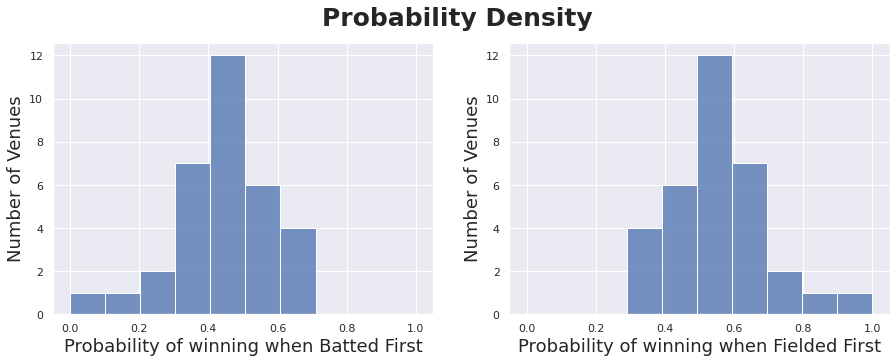

In [ ]:
winning_probability()

You can see, the probability of winning is more if you field first. But remember, this is the consolidated winning probability of the entire IPL matches. The winning chances can vary with respect to the ground you are playing on.

Considering the above point, let's plot another graph on the probability of winning and losing on each ground if you bat first or field first.


In [ ]:
batted_first_winning_probability()

In [ ]:
fielded_first_winning_probability()

## **Score Density**
---

The above two graphs can give you the probability of winning or losing, but those won’t help you build your strategy for the game. Now, let’s see the score density of each inning in the IPL.

Average Score of Inning 1:  162.49 
Average Score of Inning 2:  149.09


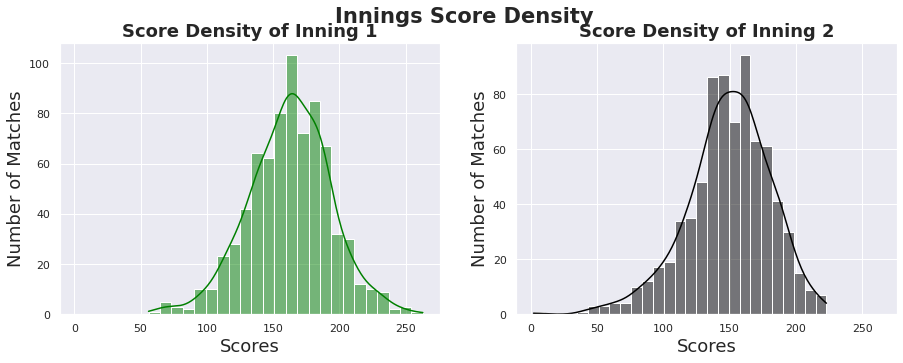

In [ ]:
innings_score_density()

From the above two beautiful hist-plots, we can clearly see the score densities of both the innings separately. But what if we merge these graphs, i.e. scores of the first inning in the x-axis and the scores of second innings in the y-axis. *Let’s see what happens!*

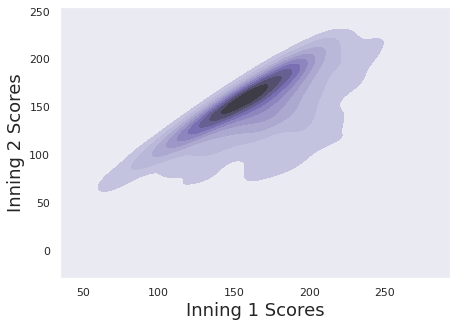

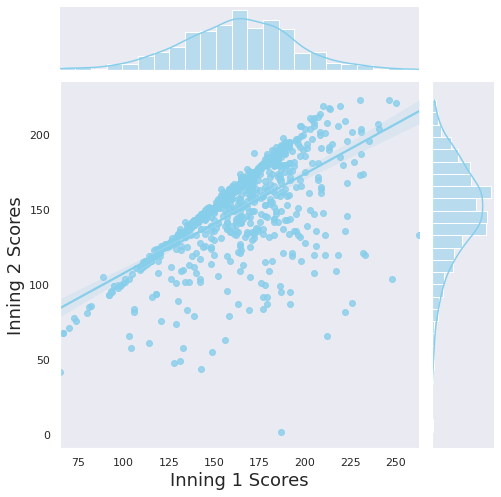

In [ ]:
score_density()

## **Match Result Analysis**
---

The KDE and the scatter plots gave us the area under which most of the scores lie. We have also calculated the average scores of both innings.

Now, with the help of average scores and the above four plots, we can identify the type of pitch you are going to play on.

Pitch type could be a crucial parameter for your strategy. So, what we considered here is,

If the average runs scored on a pitch is 10 runs more than or less than the average score of the entire IPL for a particular innings, then it is considered to be a ***BATTING*** pitch or ***BOWLING*** pitch respectively, and if it does not fall in the either of the categories, then it is considered to be a ***NORMAL*** pitch.

Now let’s plot another graph that will give you the complete picture of the scores on the selected ground with the *Winning* and *Losing Density* if you bat first or field first. Sounds a little confusing? Don’t worry, just look into the graph and you will understand everything.


In [ ]:
Venue = 'Feroz Shah Kotla Ground, Delhi' #@param ["Select Venue","Barabati Stadium, Cuttack","Brabourne Stadium, Mumbai","Buffalo Park, East London","De Beers Diamond Oval, Kimberley","Dr DY Patil Sports Academy, Mumbai","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam","Eden Gardens, Kolkata","Feroz Shah Kotla Ground, Delhi","Green Park, Kanpur","Himachal Pradesh Cricket Association Stadium, Dharamsala","Holkar Cricket Stadium, Indore","JSCA International Stadium Complex, Ranchi","Kingsmead, Durban","M. A. Chidambaram Stadium, Chennai","M. Chinnaswamy Stadium, Bangalore","Maharashtra Cricket Association Stadium, Pune","Nehru Stadium, Kochi","New Wanderers Stadium, Johannesburg","Newlands, Cape Town","OUTsurance Oval, Bloemfontein","Punjab Cricket Association IS Bindra Stadium, Chandigarh","Rajiv Gandhi International Stadium, Uppal, Hyderabad","Sardar Patel Stadium, Motera, Ahmedabad","Saurashtra Cricket Association Stadium, Rajkot","Sawai Mansingh Stadium, Jaipur","Shaheed Veer Narayan Singh International Stadium, Raipur","Sharjah Cricket Stadium, Sharjah","Sheikh Zayed Stadium, Abu Dhabi","St George's Park, Port Elizabeth","SuperSport Park, Centurion","Vidarbha Cricket Association Stadium, Jamtha, Nagpur","Wankhede Stadium, Mumbai"]
Inning = '1' #@param ["Select Inning","1","2"]


Average Runs Scored in Feroz Shah Kotla Ground, Delhi in First Inning is 165.81 
Which implies that this Ground's pitch is a NORMAL pitch. 



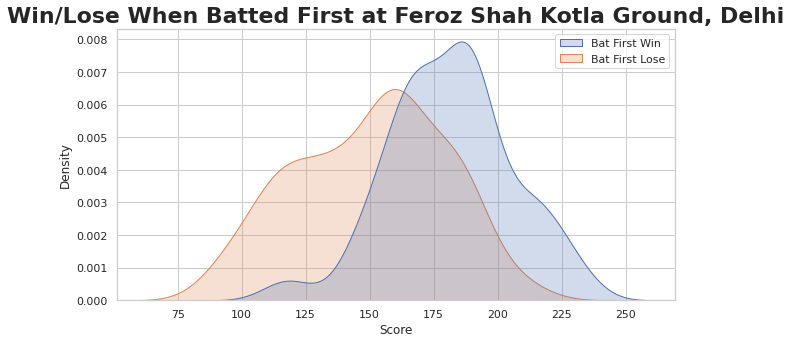

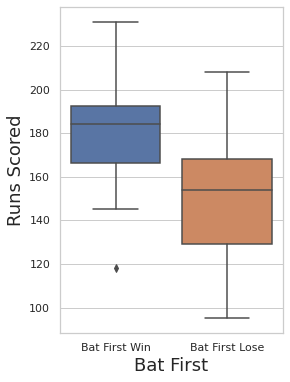

In [ ]:
match_result_analysis(Venue, Inning)

## **Team Performances by Itself**
---

The above graphs can help you understand the maximum chasable target if you field first and the minimum non-chasable target if you bat first to win the match. The area under the curve graph can tell you the density of winning and losing but the box plot can help you find the minimum, maximum, average and the outlier scores in that inning on that ground.

**Note**: There might be a possibility that the pitch turns from batting to normal or bowling to normal. Actually, the pitch becomes dry and rough in the second inning and the ball starts to turn more, because of which second inning scores sometimes change the pitch type and most importantly the second innings score completely depends on the target given by the other team.

In most of the second inning graphs of the area under the curves, if you noticed, it will give you the gist that chasing a target is easier in the IPL-T20. These graphs also conclude the  winning probability graphs seen above.


In [ ]:
Venue = 'Eden Gardens, Kolkata' #@param ["Select Venue","Barabati Stadium, Cuttack","Brabourne Stadium, Mumbai","Buffalo Park, East London","De Beers Diamond Oval, Kimberley","Dr DY Patil Sports Academy, Mumbai","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam","Eden Gardens, Kolkata","Feroz Shah Kotla Ground, Delhi","Green Park, Kanpur","Himachal Pradesh Cricket Association Stadium, Dharamsala","Holkar Cricket Stadium, Indore","JSCA International Stadium Complex, Ranchi","Kingsmead, Durban","M. A. Chidambaram Stadium, Chennai","M. Chinnaswamy Stadium, Bangalore","Maharashtra Cricket Association Stadium, Pune","Nehru Stadium, Kochi","New Wanderers Stadium, Johannesburg","Newlands, Cape Town","OUTsurance Oval, Bloemfontein","Punjab Cricket Association IS Bindra Stadium, Chandigarh","Rajiv Gandhi International Stadium, Uppal, Hyderabad","Sardar Patel Stadium, Motera, Ahmedabad","Saurashtra Cricket Association Stadium, Rajkot","Sawai Mansingh Stadium, Jaipur","Shaheed Veer Narayan Singh International Stadium, Raipur","Sharjah Cricket Stadium, Sharjah","Sheikh Zayed Stadium, Abu Dhabi","St George's Park, Port Elizabeth","SuperSport Park, Centurion","Vidarbha Cricket Association Stadium, Jamtha, Nagpur","Wankhede Stadium, Mumbai"]
Team = 'Kolkata Knight Riders' #@param ["Select Team", "Chennai Super Kings","Delhi Capitals","Gujarat Lions","Kings XI Punjab","Kochi Tuskers Kerala","Kolkata Knight Riders","Mumbai Indians","Rajasthan Royals","Rising Pune Supergiant","Royal Challengers Bangalore","Sunrisers Hyderabad"]

In [ ]:
team_performance_at_ground(Venue, Team)

,season,team1,team1_score,team1_wickets,team2,team2_score,team2_wickets,result,result_type
0,2008,opposite_team,110,10,Kolkata Knight Riders,112,5,Won by 5 wickets,Won
1,2008,Kolkata Knight Riders,137,8,opposite_team,138,3,Lost,Lost
2,2008,Kolkata Knight Riders,133,6,opposite_team,110,10,Won by 23 runs,Won
3,2008,Kolkata Knight Riders,147,8,opposite_team,150,4,Lost,Lost
4,2008,opposite_team,174,6,Kolkata Knight Riders,175,7,Won by 3 wickets,Won
...,...,...,...,...,...,...,...,...,...
65,2019,Kolkata Knight Riders,170,8,opposite_team,164,5,Won by 6 runs,Won
66,2019,opposite_team,219,4,Kolkata Knight Riders,219,5,Won by 5 wickets,Won
67,2019,Kolkata Knight Riders,185,6,opposite_team,182,7,Won by 3 runs,Won
68,2019,Kolkata Knight Riders,241,2,opposite_team,204,7,Won by 37 runs,Won


# **Conclusion**
---

**Match-wise team analysis** results demonstrate the inning statistics of players and teams in each match, by employing combinations of various statistical techniques. Through this we formed out a conclusion over the runs made by each team per over, compared teams run rate.

**Season-wise team analysis** draws an idea regarding the various batsmen and bowlers' performance in a particular season. Here we provided a comparison of the matches won or lost by teams on the ground in a season. We found out the purple cap and orange cap winner and their leading competitors in a particular season. This helped in identifying the leaderboard position of teams through which we plotted a heat map that showed us the top team for the season.

**Entire IPL analysis** includes details regarding consistent performers in the IPL, best batsman based on their total runs, average runs, and strike rate. We also analyzed the team’s performance in their home and away grounds and we have also analyzed the most favorable ground for each team.

Through probability density, we have identified the winning probability on a ground which could help a team to decide whether to bat first or field first provided they won the toss. Through the score density graph, we have estimated the minimum and maximum targets. Through match result analysis, we can estimate the winning and losing chances in a match, and the boxplot signifies the minimum, maximum average, and exceptional(outliers) score at a ground. We have also compared the team's performances with itself on a particular ground.



## ***Talent wins games, but teamwork and intelligence wins championships***